# Customer Segmentation and Performance Marketing Project

---
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. <br>It helps a business to better understand its customers and makes it easier for them to modify products <br>according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. <br>For example, instead of spending money to market a new product to every customer in the company’s database, <br>a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

(ps: Info above is quoted from:  https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/input)

---
<h3 style="color:green;">Step 1: Import libraries and load data from Kaggle</h3>


In [248]:
#Import libraries
import numpy as np 
import pandas as pd
import os

#Set display to show all columns
pd.set_option('display.max_columns', None)


In [249]:
#Load Dataset 
data_path = 'data/marketing_campaign.csv'
df = pd.read_csv(data_path)
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


Transforme the data into right format

In [250]:
df.shape 

(2240, 1)

In [251]:
df.columns[0]

'ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'

In [252]:
df.iloc[:,0]

0       5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1       2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2       4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3       6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4       5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
                              ...                        
2235    10870\t1967\tGraduation\tMarried\t61223\t0\t1\...
2236    4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...
2237    7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...
2238    8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...
2239    9405\t1954\tPhD\tMarried\t52869\t1\t1\t15-10-2...
Name: ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_

In [253]:
#Split the file to the right format
new_columns = df.columns[0].split('\t')
df_split = df.iloc[:, 0].str.split('\t', expand=True)

# Add the column names
df_split.columns = new_columns

#Let's have a look at the splited data
display(
    df_split.shape,
    df_split.dtypes,
    df_split.isnull().sum(),
    df_split.describe(),
    df_split.head(),
    )

(2240, 29)

ID                     object
Year_Birth             object
Education              object
Marital_Status         object
Income                 object
Kidhome                object
Teenhome               object
Dt_Customer            object
Recency                object
MntWines               object
MntFruits              object
MntMeatProducts        object
MntFishProducts        object
MntSweetProducts       object
MntGoldProds           object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Response               object
dtype: object

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,2240,59,5,8,1975,3,3,663,100,776,158,558,182,177,213,15,15,14,14,16,2,2,2,2,2,2,1,1,2
top,1448,1976,Graduation,Married,,0,0,31-08-2012,56,2,0,7,0,0,1,1,2,0,3,7,0,0,0,0,0,0,3,11,0
freq,1,89,1127,864,24,1293,1158,12,37,42,400,53,384,419,73,970,373,586,490,393,2077,2073,2077,2096,2210,2219,2240,2240,1906


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


---
<h3 style="color:green;">Step 2: Feature Engineering</h3>


In [254]:
df_split['Children'] = pd.to_numeric(df_split['Kidhome'])+ pd.to_numeric(df_split['Teenhome'])
df_split['Children'].unique()

array([0, 2, 1, 3])

**About the Datase:**

Customer Information

| **Feature**        | **Description**                                               |
|--------------------|---------------------------------------------------------------|
| ID                 | Unique identifier for each customer                           |
| Year_Birth         | Customer's birth year                                         |
| Education          | Customer's education level                                    |
| Marital_Status     | Customer's marital status                                     |
| Income             | Customer's yearly household income                            |
| Kidhome            | Number of children in the customer's household                |
| Teenhome           | Number of teenagers in the customer's household               |
| Childrenhome       | Number of teenagers and kids in the customer's household      |
| Dt_Customer        | Date of customer's enrollment with the company                |
| Recency            | Number of days since the customer's last purchase             |
 



Products

| **Feature**        | **Description**                                               |
|--------------------|---------------------------------------------------------------|
| MntWines           | Amount spent on wine in the last 2 years                      |
| MntFruits          | Amount spent on fruits in the last 2 years                    |
| MntMeatProducts    | Amount spent on meat products in the last 2 years             |
| MntFishProducts    | Amount spent on fish products in the last 2 years             |
| MntSweetProducts   | Amount spent on sweet products in the last 2 years            |
| MntGoldProds       | Amount spent on gold products in the last 2 years             |



Purchase Channels

| **Feature**        | **Description**                                               |
|--------------------|---------------------------------------------------------------|
| NumWebPurchases    | Number of web purchases made by the customer                  |
| NumCatalogPurchases| Number of catalog purchases made by the customer              |
| NumStorePurchases  | Number of store purchases made by the customer                |
| NumWebVisitsMonth  | Number of web visits made by the customer in a month          |


Promotion

| **Feature**        | **Description**                                               |
|--------------------|---------------------------------------------------------------|
| NumDealsPurchases  | Number of purchases made through promotions                   |
| AcceptedCmp1       | Whether the customer accepted campaign 1                      |
| AcceptedCmp2       | Whether the customer accepted campaign 2                      |
| AcceptedCmp3       | Whether the customer accepted campaign 3                      |
| AcceptedCmp4       | Whether the customer accepted campaign 4                      |
| AcceptedCmp5       | Whether the customer accepted campaign 5                      |
| Response           | Whether the customer responded to the promotion               |


In [255]:
df_split['Year_Birth'] = pd.to_numeric(df_split['Year_Birth'])
df_split.dtypes

ID                     object
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                object
Teenhome               object
Dt_Customer            object
Recency                object
MntWines               object
MntFruits              object
MntMeatProducts        object
MntFishProducts        object
MntSweetProducts       object
MntGoldProds           object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Response               object
Children                int64
dtype: object

In [256]:
df_split.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [257]:
df_split.iloc[:, 4:] = df_split.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

In [258]:
print(
    df_split.shape,
    df_split['ID'].nunique())

(2240, 30) 2240


---
 #### Age Group
85% customers of the company are over 40 years old, and none of the customers is under 18 

In [259]:

import matplotlib.pyplot as plt
import pandas as pd

# Calculate age
current_year = pd.to_datetime('today').year
df_split['Age'] = current_year - df_split['Year_Birth']

# Define age bins
bins = [0, 18, 30, 40, 50, 60, 100]  
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']

# Create a new column with the age groups
df_split['Age Group'] = pd.cut(df_split['Age'], bins=bins, labels=labels, right=False)

# Count the number of customers in each age group
age_group_counts = df_split['Age Group'].value_counts().sort_index()

# Select the relevant columns
df_Age_Group= df_split[['Age Group', 'Recency', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']]

# Define the columns for which you want to calculate the median
median_columns = ['Recency', 'Income', 'Kidhome', 'Teenhome']

# Define the columns to aggregate (sum for these columns)
aggregate_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                     'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                     'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Create the grouped DataFrame
df_Age = df_Age_Group.groupby('Age Group',observed=True).agg(
    {**{col: 'median' for col in median_columns},  # Median for selected columns
     **{col: 'sum' for col in aggregate_columns}}  # Sum for selected columns
).reset_index()

# Display the grouped DataFrame
df_Age


,Age Group,Recency,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,19-30,56.0,34824.0,0.0,0.0,1424,117,1631,270,293,209,9,18,25,41,35,2,0,1,0,0,1
1,31-40,47.0,38595.5,0.5,0.0,55480,6664,43807,8594,6648,9485,356,723,532,1178,1137,18,11,26,23,3,1
2,41-50,47.0,43586.0,1.0,0.0,135284,13892,82611,20417,14338,22874,1240,2083,1277,2958,3112,54,27,35,33,4,8
3,51-60,48.5,48877.0,0.5,1.0,192663,15971,101012,21434,16568,27110,1727,2786,1575,3772,3819,45,56,43,26,10,0
4,60+,52.0,58177.5,0.0,1.0,295187,22123,144332,33224,22706,38680,1873,3533,2547,5013,3796,44,73,57,62,13,10


In [260]:
# Count the number of customers in each age group
age_group_counts = df_split['Age Group'].value_counts().sort_index()
age_group_pertentage = (age_group_counts / len(df_split)) * 100
age_group_pertentage=age_group_pertentage.round(2)
display(age_group_pertentage)


Age Group
0-18      0.00
19-30     0.31
31-40     9.55
41-50    24.87
51-60    30.18
60+      34.96
Name: count, dtype: float64

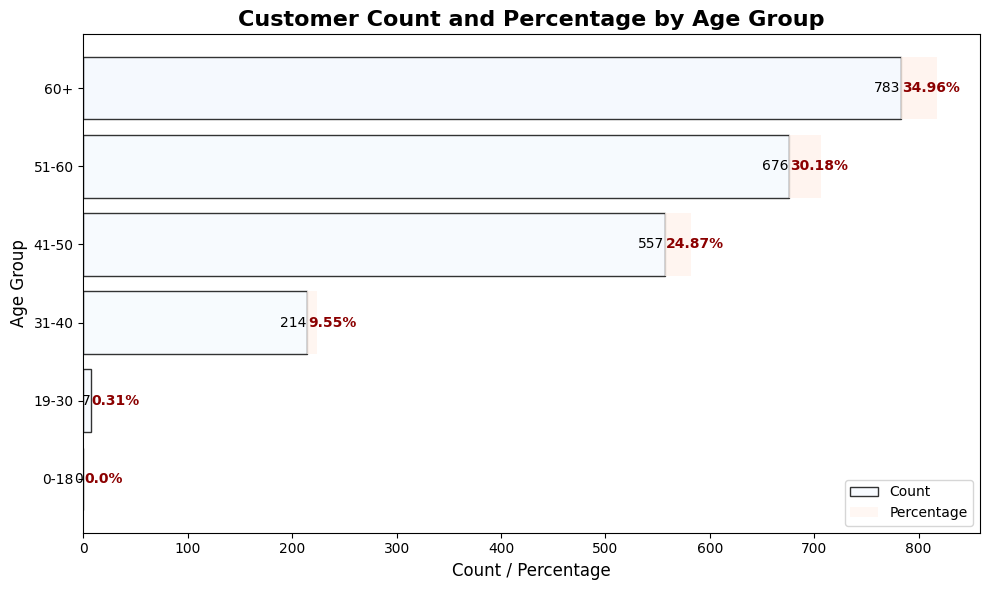

In [261]:
import matplotlib.pyplot as plt

# Calculate the count of customers in each age group
age_group_counts = df_split['Age Group'].value_counts().sort_index()

# Calculate the percentage of customers in each age group
age_group_percentage = (age_group_counts / len(df_split)) * 100
age_group_percentage = age_group_percentage.round(2)

# Create a DataFrame for plotting
age_group_df = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage': age_group_percentage
})

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create horizontal bars for counts with professional color theme (Blues)
bars = ax.barh(age_group_df.index.astype(str), age_group_df['Count'], 
               color=plt.cm.Blues(range(len(age_group_df))), 
               edgecolor='black', alpha=0.8, label='Count')

# Overlay the percentage values with a different color theme (Reds)
bars_percentage = ax.barh(age_group_df.index.astype(str), age_group_df['Percentage'], 
                          left=age_group_df['Count'], 
                          color=plt.cm.Reds(range(len(age_group_df))), 
                          alpha=0.8, label='Percentage')

# Add labels to each bar
for bar, count, percentage in zip(bars, age_group_df['Count'], age_group_df['Percentage']):
    # Label for count, placed inside the bar (left of the count bar)
    ax.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height() / 2, f"{count}", 
            ha='right', va='center', fontsize=10, color='black')
    
    # Label for percentage, placed after the count bar, bold and in a different color
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f"{percentage}%", 
            ha='left', va='center', fontsize=10, color='darkred', fontweight='bold')

# Set labels and title
plt.title('Customer Count and Percentage by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Count / Percentage', fontsize=12)
plt.ylabel('Age Group', fontsize=12)

# Show legend
plt.legend()

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


---
#### Number of children at home
71.52% of customers have at least 1 child at home. 

In [262]:
import pandas as pd

# Calculate the count of customers for Kidhome and Teenhome
kidhome_counts = df_split['Kidhome'].value_counts()
teenhome_counts = df_split['Teenhome'].value_counts()
childrenhome_counts = df_split['Children'].value_counts()

# Create DataFrames for Kidhome and Teenhome with percentages
kidhome_df = pd.DataFrame({
    'Count': kidhome_counts,
    'Percentage': (kidhome_counts / len(df_split)) * 100
}).reset_index()
kidhome_df.columns = ['Kidhome', 'Count', 'Percentage']
kidhome_df['Percentage'] = kidhome_df['Percentage'].round(2)

teenhome_df = pd.DataFrame({
    'Count': teenhome_counts,
    'Percentage': (teenhome_counts / len(df_split)) * 100
}).reset_index()

teenhome_df.columns = ['Teenhome', 'Count', 'Percentage']
teenhome_df['Percentage'] = teenhome_df['Percentage'].round(2)


childrenhome_df = pd.DataFrame({
    'Count': childrenhome_counts,
    'Percentage': (childrenhome_counts / len(df_split)) * 100
}).reset_index()

childrenhome_df.columns = ['Childrenhome', 'Count', 'Percentage']
childrenhome_df['Percentage'] = childrenhome_df['Percentage'].round(2)

# Display the DataFrames
display(kidhome_df, kidhome_counts.sum(),teenhome_df,teenhome_counts.sum(),childrenhome_df,childrenhome_counts.sum())


,Kidhome,Count,Percentage
0,0,1293,57.72
1,1,899,40.13
2,2,48,2.14


np.int64(2240)

,Teenhome,Count,Percentage
0,0,1158,51.70
1,1,1030,45.98
2,2,52,2.32


np.int64(2240)

,Childrenhome,Count,Percentage
0,1,1128,50.36
1,0,638,28.48
2,2,421,18.79
3,3,53,2.37


np.int64(2240)

In [263]:
100-28.48

71.52

In [264]:
import pandas as pd

# Define possible values for Kidhome and Teenhome
kidhome_values = [0, 1, 2]  
teenhome_values = [0, 1, 2] 

# List to store the combinations and customer counts
children = []

# Get the total number of customers
total_customers = len(df_split)

# Loop through all possible combinations of Kidhome and Teenhome
for i in kidhome_values:
    for j in teenhome_values:
        # Filter the DataFrame based on the current values of Kidhome and Teenhome
        d = df_split[(df_split['Kidhome'] == i) & (df_split['Teenhome'] == j)]
        
        # Get the count of customers for this combination
        customer_count = d.shape[0]
        
        # Calculate the percentage
        percentage = (customer_count / total_customers) * 100
        
        # Append the combination, count, and percentage to the list
        children.append({'Kidhome': i, 'Teenhome': j, 'Customer_Count': customer_count, 'Percentage': round(percentage, 2)})

# Convert the list into a DataFrame
children_df = pd.DataFrame(children).sort_values(by='Customer_Count', ascending=False)

# Display the resulting DataFrame
print(children_df)




   Kidhome  Teenhome  Customer_Count  Percentage
0        0         0             638       28.48
1        0         1             625       27.90
3        1         0             503       22.46
4        1         1             374       16.70
7        2         1              31        1.38
2        0         2              30        1.34
5        1         2              22        0.98
6        2         0              17        0.76
8        2         2               0        0.00


---
#### Education Level
88.53% of the customer has a bachelor's or higher degree

In [265]:
# Initialize the dictionary with education levels
Education_Level = {edu: 0 for edu in df_split['Education'].unique()}

# Count the number of customers for each education level
for edu in Education_Level.keys():
    Education_Level[edu] = df_split[df_split['Education'] == edu]['Education'].count()

# Convert the dictionary to a DataFrame
Education_Level_df = pd.DataFrame(Education_Level.items(), columns=['Education', 'Count'])

# Sort the DataFrame by count and reset the index
Education_Level_df.sort_values(by='Count', ascending=False, inplace=True)
Education_Level_df.reset_index(drop=True, inplace=True)
Education_Level_df['Percentage'] = Education_Level_df['Count'] / Education_Level_df['Count'].sum() * 100
Education_Level_df['Percentage']=Education_Level_df['Percentage'].round(2)
Education_Level_df

,Education,Count,Percentage
0,Graduation,1127,50.31
1,PhD,486,21.70
2,Master,370,16.52
3,2n Cycle,203,9.06
4,Basic,54,2.41


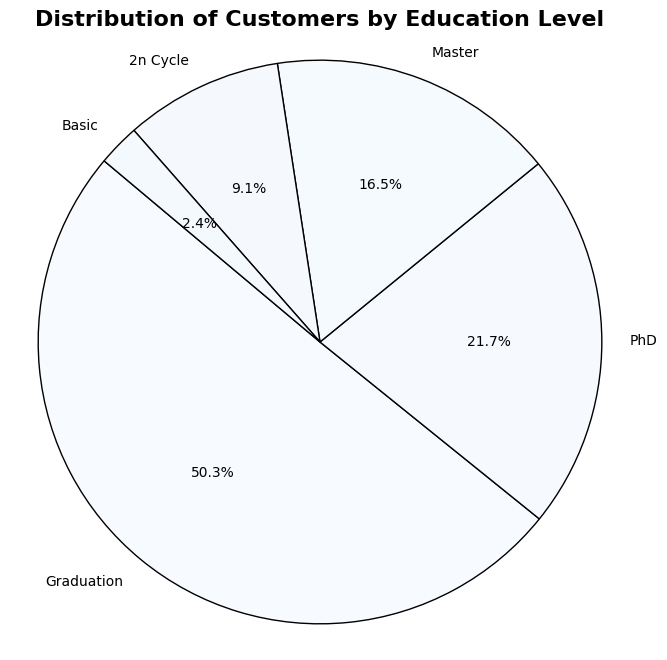

In [266]:
import matplotlib.pyplot as plt

# Pie chart visualization for Education Level percentages
plt.figure(figsize=(8, 8))
plt.pie(Education_Level_df['Percentage'], 
        labels=Education_Level_df['Education'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Blues(range(len(Education_Level_df))),  # Use Blues gradient for colors
        wedgeprops={'edgecolor': 'black'})  # Add black border around wedges

# Add a title
plt.title('Distribution of Customers by Education Level', fontsize=16, fontweight='bold')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


---
#### Income Level
66.8% of the customer earns more than 40K annually

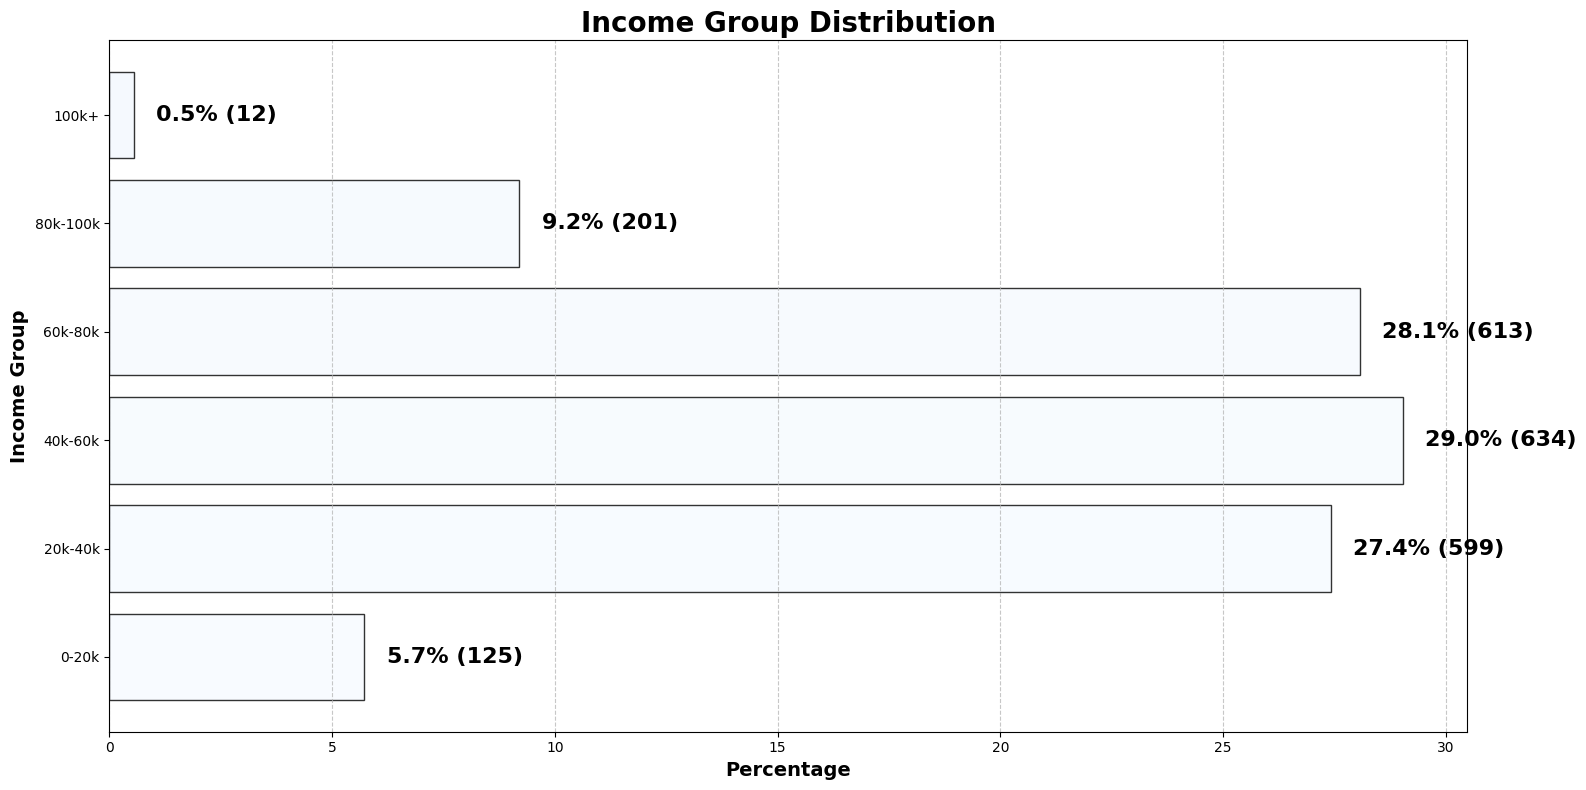

In [267]:
import matplotlib.pyplot as plt

# Define income bins and labels
bins = [0, 20000, 40000, 60000, 80000, 100000, df_split['Income'].max()]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']

# Create a new column for income groups
df_split['Income Group'] = pd.cut(df_split['Income'], bins=bins, labels=labels, right=False)

# Count the number of customers in each income group
income_group_counts = df_split['Income Group'].value_counts().sort_index()

# Calculate percentages
income_group_percentages = (income_group_counts / income_group_counts.sum()) * 100

# Create a horizontal bar chart
plt.figure(figsize=(16, 8))
bars = plt.barh(
    income_group_counts.index, 
    income_group_percentages, 
    color=plt.cm.Blues(range(len(income_group_counts))),  # Use gradient colors
    edgecolor='black', 
    alpha=0.8
)

# Add labels for percentage and count on the bars
for bar, percentage, count in zip(bars, income_group_percentages, income_group_counts):
    plt.text(
        bar.get_width() + 0.5,  # Offset the text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically
        f'{percentage:.1f}% ({count})',  # Format as "XX.X% (Count)"
        va='center', 
        fontsize=16,
        fontweight='bold',  # Make the text bold
        color='black'  # Set text color to black for visibility
    )

# Customize the chart
plt.title('Income Group Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Percentage', fontsize=14, fontweight='bold')
plt.ylabel('Income Group', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for x-axis
plt.tight_layout()  # Adjust layout to avoid clipping

# Show the chart
plt.show()


In [268]:
0.5+9.2+28.1+29

66.8

---
#### Marital Status
66.46% Customers have a partner

In [269]:
import pandas as pd

# Initialize the dictionary with marital statuses
Marital_Status_Level = {status: 0 for status in df_split['Marital_Status'].unique()}

# Count the number of customers for each marital status
for status in Marital_Status_Level.keys():
    Marital_Status_Level[status] = df_split[df_split['Marital_Status'] == status]['Marital_Status'].count()

# Convert the dictionary to a DataFrame
Marital_Status_Level_df = pd.DataFrame(Marital_Status_Level.items(), columns=['Marital Status', 'Count'])

# Sort the DataFrame by count and reset the index
Marital_Status_Level_df.sort_values(by='Count', ascending=False, inplace=True)
Marital_Status_Level_df.reset_index(drop=True, inplace=True)

Marital_Status_Level_df['Percentage'] = (Marital_Status_Level_df['Count'] / Marital_Status_Level_df['Count'].sum()) * 100
Marital_Status_Level_df['Percentage'] = Marital_Status_Level_df['Percentage'].round(2)
Marital_Status_Level_df


,Marital Status,Count,Percentage
0,Married,864,38.57
1,Together,580,25.89
2,Single,480,21.43
3,Divorced,232,10.36
4,Widow,77,3.44
5,Alone,3,0.13
6,Absurd,2,0.09
7,YOLO,2,0.09


In [270]:
38.57+25.89

64.46000000000001

---
#### Spending Capability

In this analysis, I categorize customers based on their spending total in the past 2 years. The customers are divided into three key groups: low spenders, mid spenders, and high spenders. The following table presents the breakdown of customer counts and their corresponding percentages within each group:

| Spending Group        | Count | Percentage (%) |
|-----------------------|-------|----------------|
| **0-100 Low Spenders**  | 692   | 31.73          |
| **101-1000 Mid Spenders**| 903   | 41.40          |
| **1000+ High Spenders**  | 586   | 26.87          |

Key Insights:
- **41.40% of customers** fall into the **mid-spent category (101-1000)**, which is the largest group.
- **31.73% of customers** are categorized as **low spenders (0-100)**, representing a significant portion but still less than the mid-spent group.
- **High spenders (1000+)** make up **26.87% of the customer base**, indicating a relatively smaller yet crucial segment for targeting premium offerings.


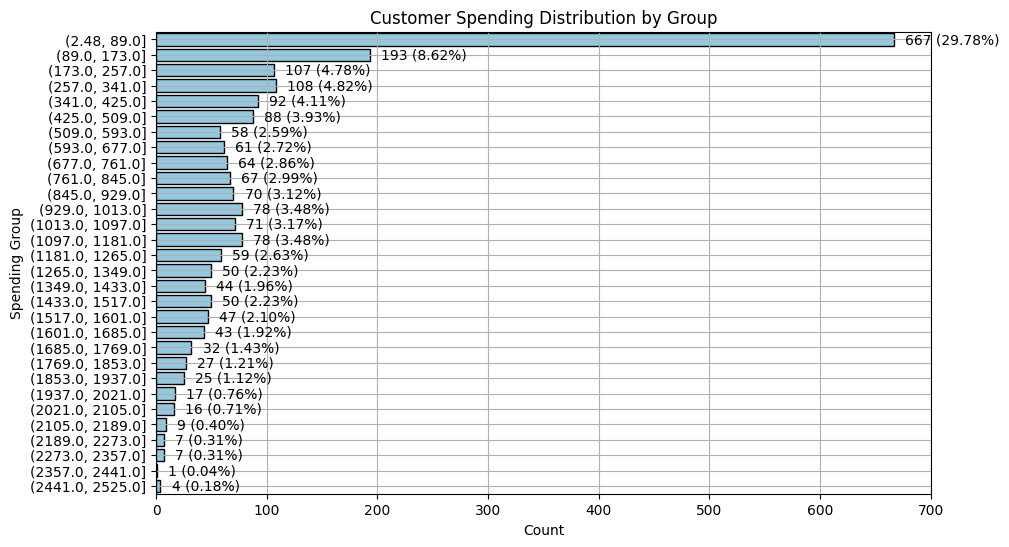

,Spending_Group,Count,Percentage
1,0-100 Low Spenders,710,31.70
0,101-1000 Mid Spenders,928,41.43
2,1000+ High Spenders,602,26.88


In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

Product_Sales_Features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_split['Customer_Spent'] = df_split[Product_Sales_Features].sum(axis=1, skipna=True)
df_split['Customer_Spent']=df_split['Customer_Spent'].astype(int)
# Create a custom number of bins based on the distribution
num_bins = 30

# Create the groups for 'Customer_Spent' using bins
df_split['Spending_Group'] = pd.cut(df_split['Customer_Spent'], bins=num_bins)

# Calculate the count and percentage for each spending group
group_counts = df_split['Spending_Group'].value_counts().sort_index()
group_percentages = (group_counts / group_counts.sum()) * 100

# Plot horizontal bar chart with both count and percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts, y=group_counts.index, color='skyblue', edgecolor='black')

# Adding count and percentage labels
for index, value in enumerate(group_counts):
    percentage = group_percentages.iloc[index]
    plt.text(value + 10, index, f'{value} ({percentage:.2f}%)', va='center')

plt.title('Customer Spending Distribution by Group')
plt.xlabel('Count')
plt.ylabel('Spending Group')
plt.grid(True)
plt.show()

# Define the custom bin edges for the spending groups
bins = [0, 100, 1000, float('inf')]  # float('inf') ensures that values above 2000 are included in the last bin
labels = ['0-100 Low Spenders', '101-1000 Mid Spenders', '1000+ High Spenders']  # Labels for the bins

# Create the 'Spending_Group' column based on the defined bins
df_split['Spending_Group'] = pd.cut(df_split['Customer_Spent'], bins=bins, labels=labels, right=False)

# Group by 'Spending_Group' to calculate count and percentage
spending_group_counts = df_split['Spending_Group'].value_counts()
spending_group_percentage = (spending_group_counts / len(df_split)) * 100
spending_group_percentage = spending_group_percentage.round(2)

# Create a DataFrame to store counts and percentages
spending_group_summary = pd.DataFrame({
    'Spending_Group': spending_group_counts.index,
    'Count': spending_group_counts,
    'Percentage': spending_group_percentage
})

spending_group_summary.reset_index(drop=True,inplace=True)
# Display the first few rows of the spending group summary
spending_group_summary.sort_values(by='Spending_Group',inplace=True)
spending_group_summary.head()


---
### Step 4: My initial assumptions

Based on my exploratory data analysis, below are my main observations:

**Age Group**  
- 85% of customers are over 40 years old, with no customers under the age of 18.

**Number of Children at Home**  
- 71.52% of customers have at least 1 child at home. 

**Education Level**  
- 88.53% of customers hold a bachelor’s degree or higher.

**Income Level**  
- 66.8% of customers earn more than $40,000 annually.

**Marital Status**  
- 66.46% of customers are not single.

**Spending Capability**  
- 31.73% are low spenders (0-100).
- 41.40% are mid spenders (101-1000).
- 26.87% are high spenders (1000+).

<span style="color:green">**Proposed Customer Segments:**</span>

1. <span style="color:green">**Young Parents (High Income, Kids at Home, Mid-Aged)**</span>  
   Characteristics: Customers in their 30s-40s, likely with a bachelor's degree or higher, earning over $40K annually, and having children at home.  
   Marketing Strategy: Family-focused promotions, deals for parents, educational products, or health and wellness products for children.

2. <span style="color:green">**Established Professionals (Older, Highly Educated, Mid-Spending)**</span>  
   Characteristics: Customers over 40, with high educational attainment, and stable income. Likely in mid-spending categories.  
   Marketing Strategy: Premium but mid-range offers. Focus on long-term value, sophistication, and professional lifestyle needs.

3. <span style="color:green">**Affluent Couples (Older, High Income, High Spend)**</span>  
   Characteristics: Couples with no children or older children, over 40 years old, highly educated, and with higher-than-average incomes.  
   Marketing Strategy: Luxury products, exclusive offers, and couple-specific marketing.

4. <span style="color:green">**Budget-Conscious Families (Lower Income, Kids at Home)**</span>  
   Characteristics: Customers who are younger (mid-30s), with children, earning less than $40K annually, and likely in low-spending groups.  
   Marketing Strategy: Affordable family products, cost-effective solutions, and discount-based offers.

5. <span style="color:green">**Premium Customers (Older, High Income, High Spend)**</span>  
   Characteristics: Customers over 40, highly educated, with higher income and high spending capability.  
   Marketing Strategy: Target with premium products or services, luxury offers, or exclusive loyalty programs.


---

***What can marketing team potentially take away from it?*** <br>

- 1. Family-Oriented Offers for the high percentage of customers with children. 
- 2. Professional and Premium Marketing for highly educated and high-income segments.
- 3. Value-Based Campaigns for the large low-spending group, offering budget-friendly options.







---
### Step 5: Assumption Testing via K-Means Clustering

In [272]:
df_split.pop('Dt_Customer')

df_split.dropna(inplace=True)

df_split.isnull().sum() #checking for null values


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Children               0
Age                    0
Age Group              0
Income Group           0
Customer_Spent         0
Spending_Group         0
dtype: int64

In [273]:
df_split.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Children', 'Age',
       'Age Group', 'Income Group', 'Customer_Spent', 'Spending_Group'],
      dtype='object')

In [274]:
df_split.dtypes

ID                       object
Year_Birth                int64
Education                object
Marital_Status           object
Income                   object
Kidhome                  object
Teenhome                 object
Recency                  object
MntWines                 object
MntFruits                object
MntMeatProducts          object
MntFishProducts          object
MntSweetProducts         object
MntGoldProds             object
NumDealsPurchases        object
NumWebPurchases          object
NumCatalogPurchases      object
NumStorePurchases        object
NumWebVisitsMonth        object
AcceptedCmp3             object
AcceptedCmp4             object
AcceptedCmp5             object
AcceptedCmp1             object
AcceptedCmp2             object
Complain                 object
Z_CostContact            object
Z_Revenue                object
Response                 object
Children                  int64
Age                       int64
Age Group              category
Income G

In [275]:
df_split.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Age Group,Income Group,Customer_Spent,Spending_Group
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,67,60+,40k-60k,1617,1000+ High Spenders
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,70,60+,40k-60k,27,0-100 Low Spenders
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,59,51-60,60k-80k,776,101-1000 Mid Spenders
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,40,41-50,20k-40k,53,0-100 Low Spenders
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,43,41-50,40k-60k,422,101-1000 Mid Spenders


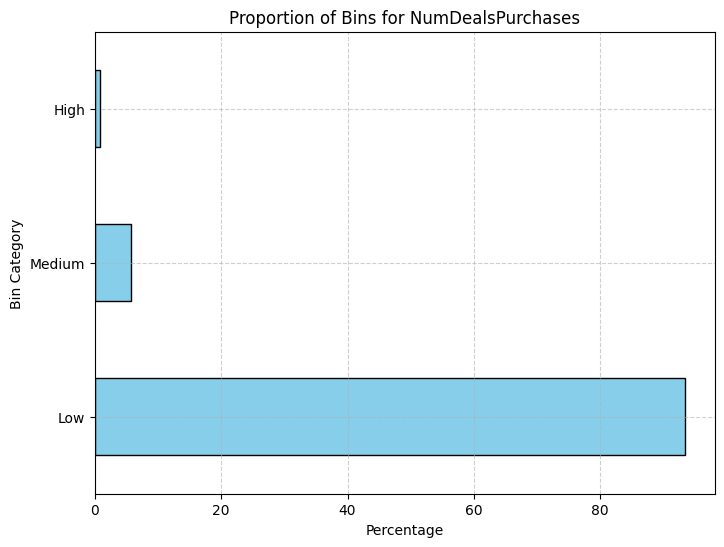

Proportions for NumDealsPurchases:
NumDealsPurchases_Bin
Low       93.443375
Medium     5.731316
High       0.825309
Name: proportion, dtype: float64




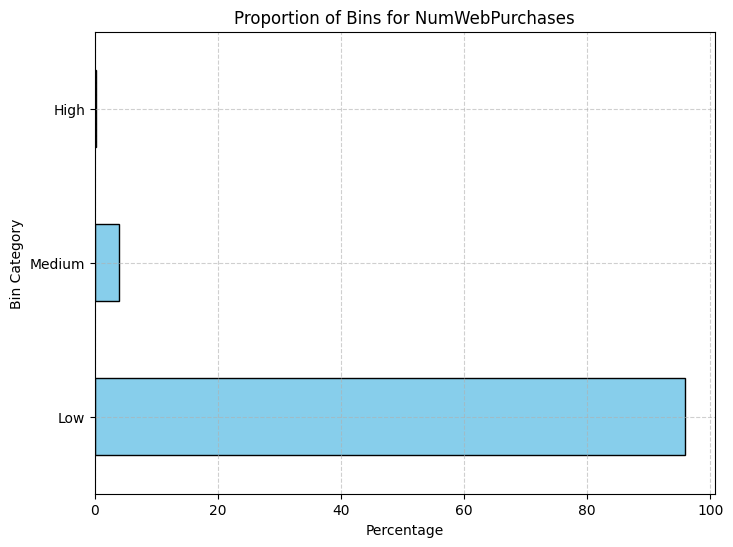

Proportions for NumWebPurchases:
NumWebPurchases_Bin
Low       95.919303
Medium     3.943145
High       0.137552
Name: proportion, dtype: float64




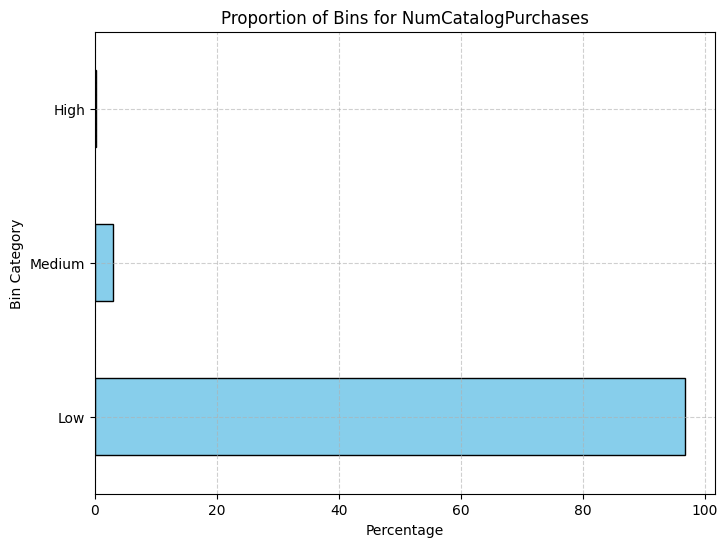

Proportions for NumCatalogPurchases:
NumCatalogPurchases_Bin
Low       96.836314
Medium     2.980284
High       0.183402
Name: proportion, dtype: float64




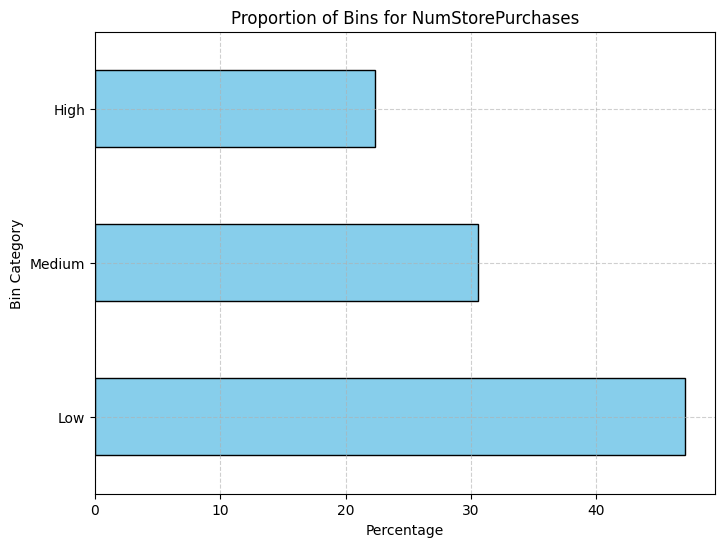

Proportions for NumStorePurchases:
NumStorePurchases_Bin
Low       47.088492
Medium    30.582302
High      22.329207
Name: proportion, dtype: float64




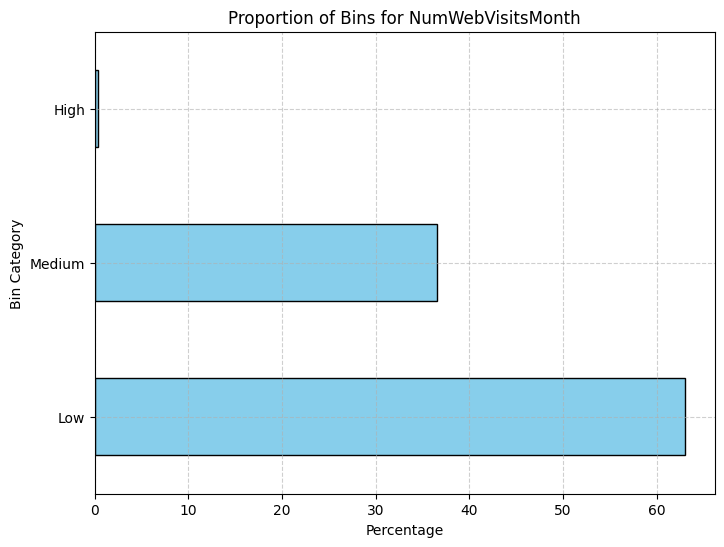

Proportions for NumWebVisitsMonth:
NumWebVisitsMonth_Bin
Low       63.044475
Medium    36.588721
High       0.366804
Name: proportion, dtype: float64




In [276]:
import matplotlib.pyplot as plt
import pandas as pd

# Order Channel Preference Features
Order_Channel_Preference_Features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Plotting the distribution of each feature's bins
for i in Order_Channel_Preference_Features:
    # Create 3 bins for each feature
    bins = pd.cut(df_split[i], bins=3, labels=["Low", "Medium", "High"], include_lowest=True)
    df_split[f'{i}_Bin'] = bins  # Add the bin labels as a new column
    
    # Calculate the proportions (percentages) for each bin
    bin_proportions = df_split[f'{i}_Bin'].value_counts(normalize=True) * 100  # Normalized to get percentages

    # Plotting the horizontal bar chart for the proportions of each bin
    plt.figure(figsize=(8, 6))
    bin_proportions.sort_index().plot(kind='barh', color='skyblue', edgecolor='black')
    plt.title(f'Proportion of Bins for {i}')
    plt.xlabel('Percentage')
    plt.ylabel('Bin Category')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Display the proportions for each bin
    print(f"Proportions for {i}:")
    print(bin_proportions)
    print("\n")


In [277]:
import pandas as pd

# Order Channel Preference Features
Order_Channel_Preference_Features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Loop through each feature to create 3 bins
for i in Order_Channel_Preference_Features:
    # Display the feature name, min and max values
    print(f"Feature: {i}")
    print(f"Min: {df_split[i].min()}, Max: {df_split[i].max()}")
    
    # Create 3 bins for each feature
    bins = pd.cut(df_split[i], bins=3, labels=["Low", "Medium", "High"], include_lowest=True)
    
    # Add the bin labels as a new column in df_split
    df_split[f'{i}_Bin'] = bins

# Display the first few rows of df_split to check the results
display(df_split.head())


Feature: NumDealsPurchases
Min: 0, Max: 15
Feature: NumWebPurchases
Min: 0, Max: 27
Feature: NumCatalogPurchases
Min: 0, Max: 28
Feature: NumStorePurchases
Min: 0, Max: 13
Feature: NumWebVisitsMonth
Min: 0, Max: 20


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Age Group,Income Group,Customer_Spent,Spending_Group,NumDealsPurchases_Bin,NumWebPurchases_Bin,NumCatalogPurchases_Bin,NumStorePurchases_Bin,NumWebVisitsMonth_Bin
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,67,60+,40k-60k,1617,1000+ High Spenders,Low,Low,Medium,Low,Medium
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,70,60+,40k-60k,27,0-100 Low Spenders,Low,Low,Low,Low,Low
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,59,51-60,60k-80k,776,101-1000 Mid Spenders,Low,Low,Low,High,Low
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,40,41-50,20k-40k,53,0-100 Low Spenders,Low,Low,Low,Low,Low
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,43,41-50,40k-60k,422,101-1000 Mid Spenders,Low,Low,Low,Medium,Low


After some experients, i decide to use 'Children' and 'Spending Group' as the input feature for customer clustering.

Silhouette Score for 3 clusters: 0.65


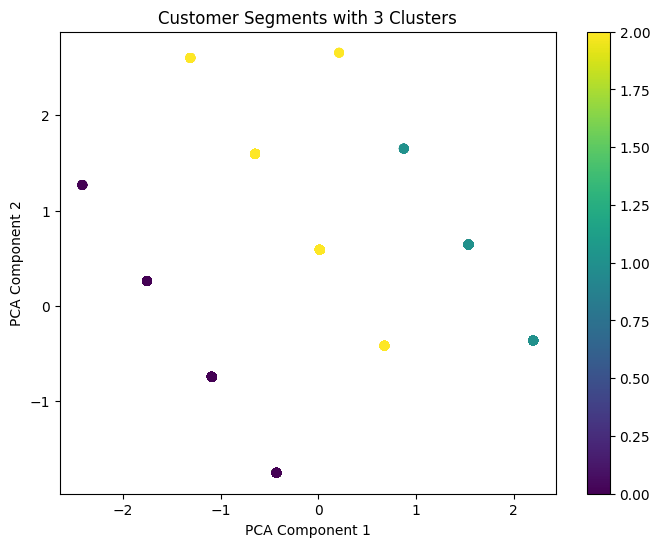

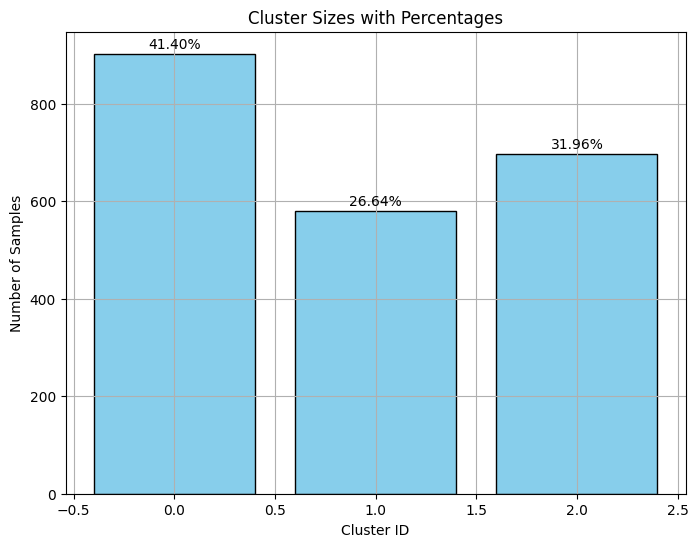

In [278]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Prepare Features
Customer_Information_Features = ['Children']

Order_Channel_Preference_Features = ['NumDealsPurchases_Bin', 'NumWebPurchases_Bin', 'NumCatalogPurchases_Bin', 'NumStorePurchases_Bin']

# Selecting relevant features for clustering
features = Customer_Information_Features
X = df_split[features]

X = X.apply(pd.to_numeric, errors='coerce')

# Convert categorical variables into dummy variables
# df_encoded = pd.get_dummies(pd.concat([df_split[['Income Group', 'Spending_Group']], df_split[Order_Channel_Preference_Features]], axis=1), drop_first=True)
df_encoded = pd.get_dummies(df_split[['Spending_Group']], drop_first=True)

# Combine the numerical and categorical features
X = pd.concat([X, df_encoded], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Manually set the number of clusters 
n_clusters = 3

# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df_split['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, df_split['Cluster'])
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")

# Check the distribution of samples in each cluster
cluster_counts = df_split['Cluster'].value_counts()
cluster_percentages = (cluster_counts / len(df_split)) * 100

# Visualize the clusters using PCA for dimensionality reduction (2D visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_split['Cluster'], cmap='viridis')
plt.title(f'Customer Segments with {n_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Visualize the cluster sizes with percentage
cluster_sizes = cluster_counts.sort_values()
cluster_percentages_sorted = cluster_percentages[cluster_sizes.index]

plt.figure(figsize=(8, 6))
bars = plt.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue', edgecolor='black')

# Add percentage labels on the bars
for bar, percentage in zip(bars, cluster_percentages_sorted):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title("Cluster Sizes with Percentages")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()


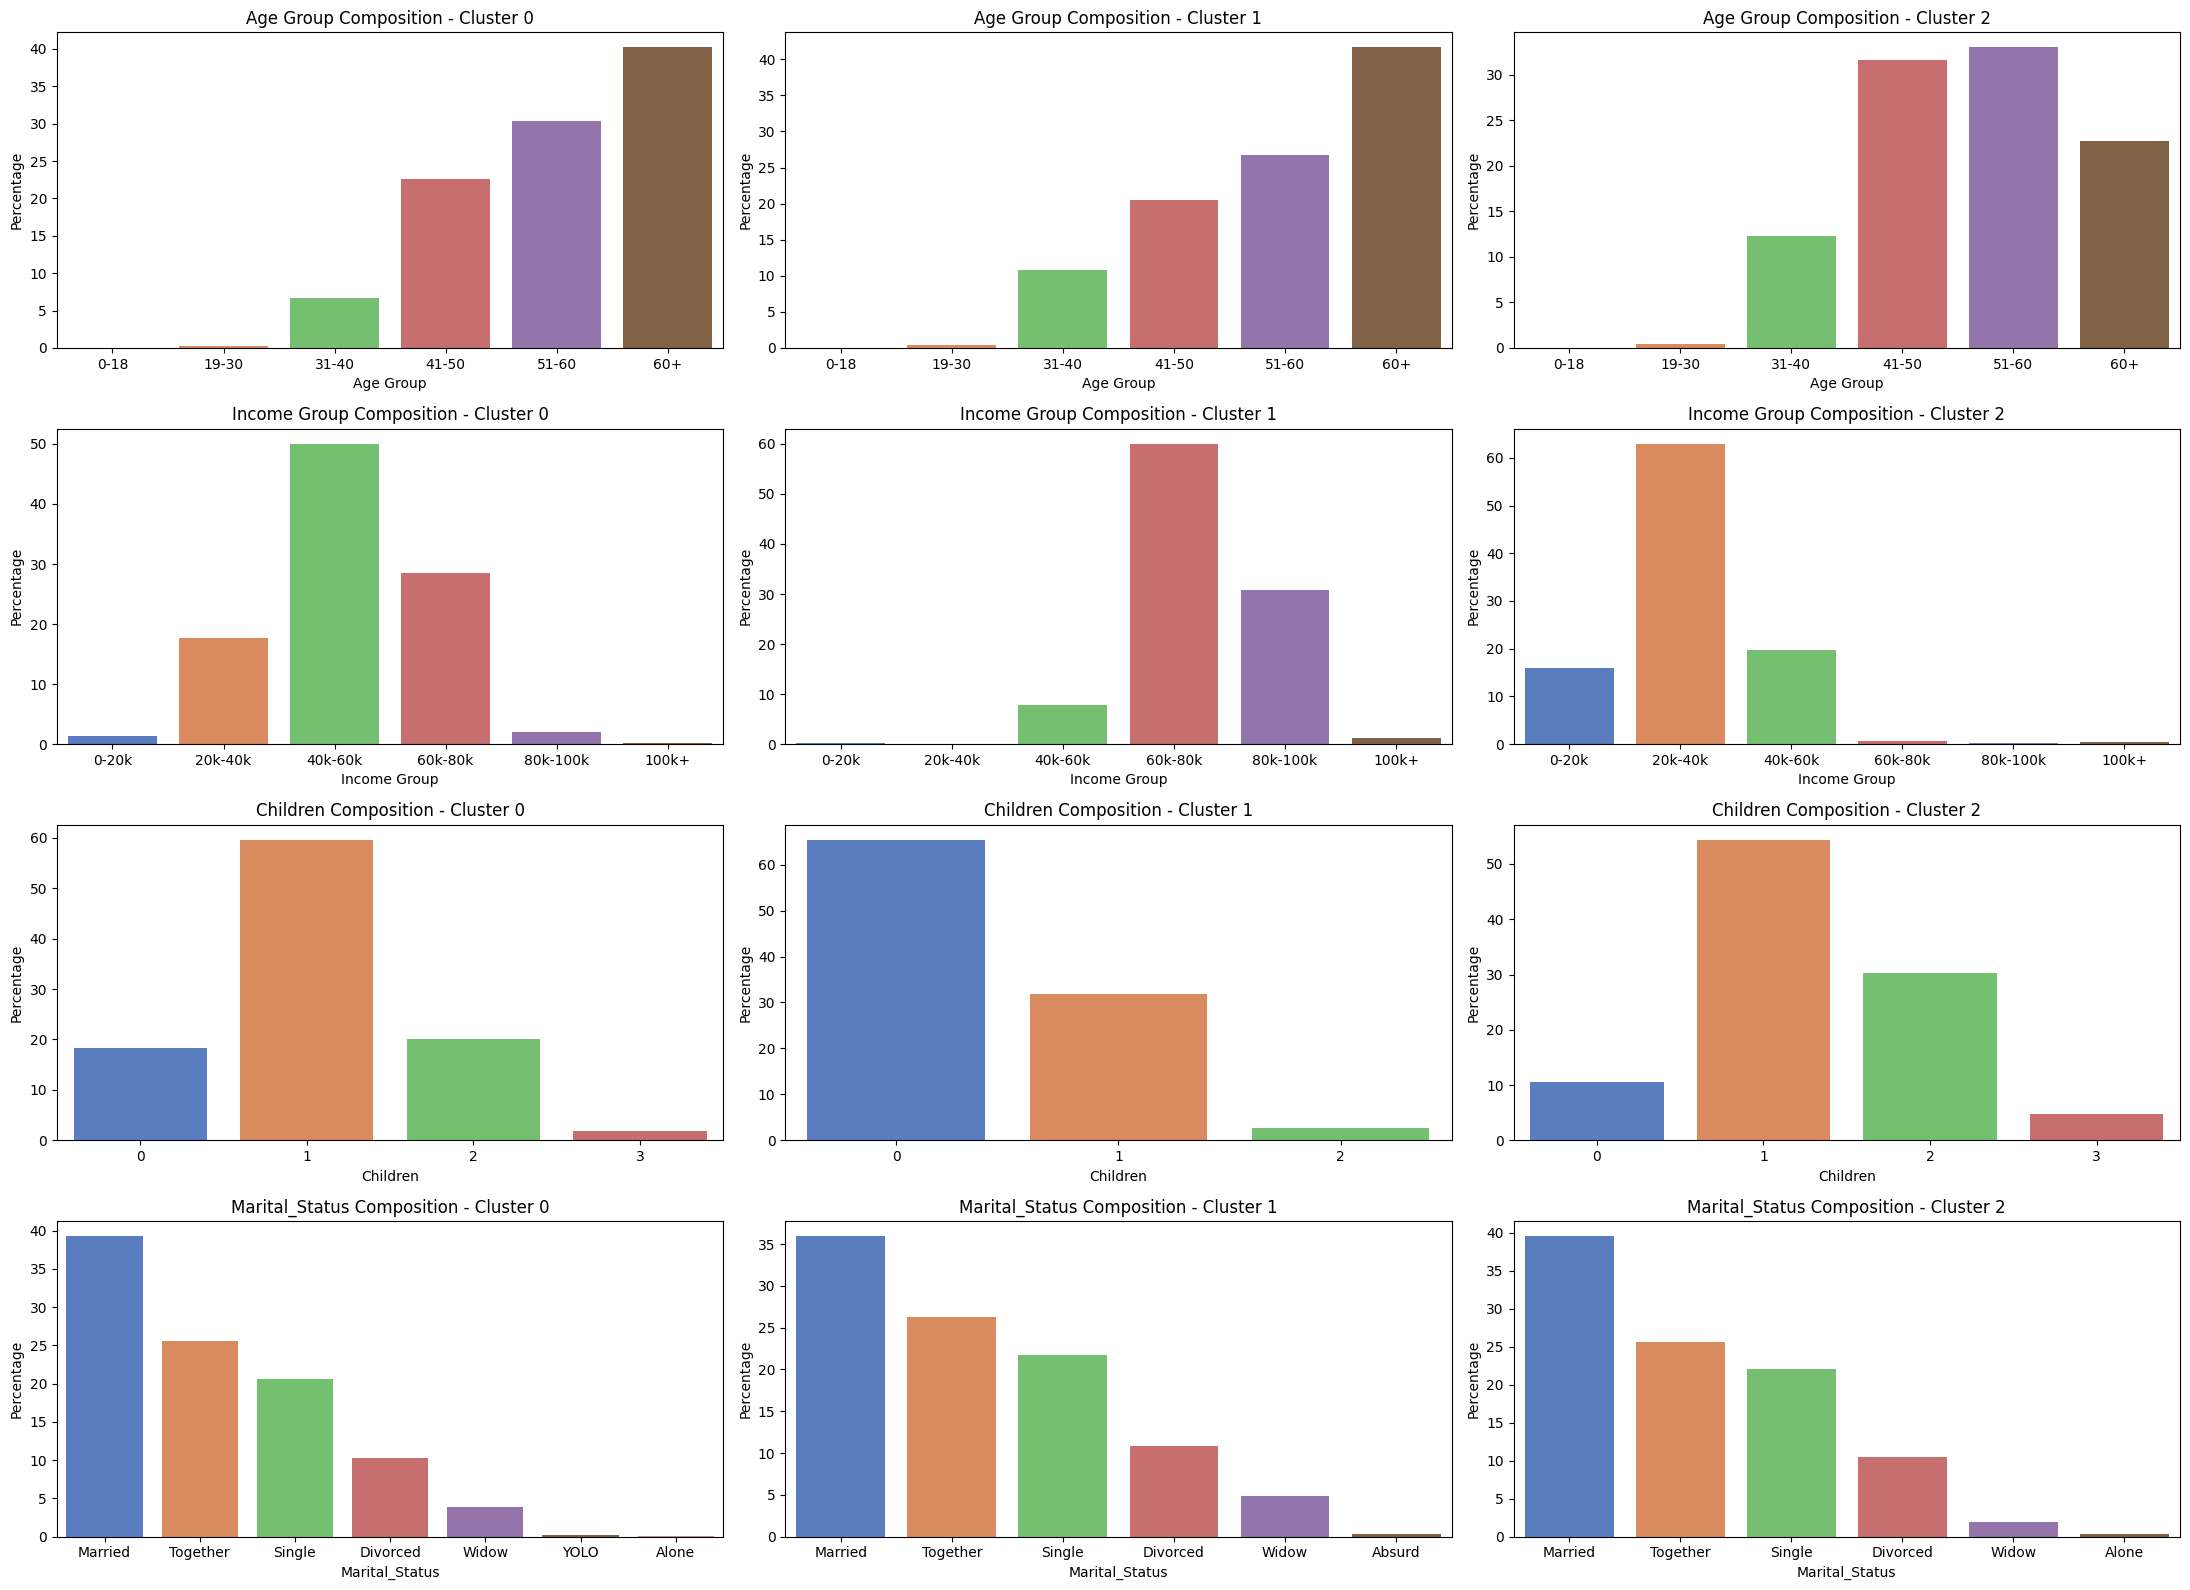

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features for visualization
features = ['Age Group', 'Income Group', 'Children', 'Marital_Status']

# Set up the figure
n_clusters = len(df_split['Cluster'].unique())
fig, axes = plt.subplots(4, n_clusters, figsize=(22, 16))  # 4 rows, one for each feature

# Loop through each cluster
for cluster_id in df_split['Cluster'].unique():
    # Filter the data for the specific cluster
    cluster_data = df_split[df_split['Cluster'] == cluster_id]
    
    # Loop through each feature and create the bar plots for the specific cluster
    for i, feature in enumerate(features):
        # Count the occurrences of each category in the feature for the specific cluster
        feature_counts = cluster_data[feature].value_counts().reset_index()
        feature_counts.columns = [feature, 'Count']
        feature_counts['Percentage'] = (feature_counts['Count'] / feature_counts['Count'].sum()) * 100

        # Create the bar plot for the feature
        sns.barplot(data=feature_counts, x=feature, y='Percentage', ax=axes[i, cluster_id], hue=feature, palette="muted", legend=False)
        
        # Set plot titles and labels
        axes[i, cluster_id].set_title(f'{feature} Composition - Cluster {cluster_id}')
        axes[i, cluster_id].set_xlabel(feature)
        axes[i, cluster_id].set_ylabel('Percentage')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [280]:
# Calculate the cluster counts and percentages
cluster_counts = df_split['Cluster'].value_counts()
cluster_percentages = (cluster_counts / len(df_split)) * 100

# Create a DataFrame to summarize the cluster distribution
cluster_summary_df = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Percentage': cluster_percentages.values
})

cluster_summary_df_sorted = cluster_summary_df.sort_values(by='Cluster')
cluster_summary_df_sorted['Percentage'] = cluster_summary_df_sorted['Percentage'].round(2)
print(cluster_summary_df_sorted)


   Cluster  Count  Percentage
0        0    903       41.40
2        1    581       26.64
1        2    697       31.96


# <span style="color:green;">Customer Profiling Summary</span>

| **Cluster** | **Cluster Percentage** | **Age Group** | **Children** | **Income Range**  | **Key Characteristics**                                                                                                                                   | **Target Marketing Strategy**                                                       |
|-------------|------------------------|---------------|--------------|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| **0**       | 41.40%                 | 50-60+        | 1-2          | 40K - 80K         | Mid-aged families with 1 or 2 children, moderate income, likely prioritize practical, family-oriented solutions.                                           | Focus on family-oriented products, promotions, and value-driven offers.           |
| **1**       | 26.64%                 | 50-60+        | 0 or 1       | 60K - 100K        | Affluent couples with higher disposable income, fewer children. Likely looking for premium, sophisticated products.                                        | Offer luxury products, exclusive discounts, and professional lifestyle solutions. |
| **2**       | 31.96%                 | 40-60         | 1-3          | 20K - 40K         | Budget-conscious families with children at home, lower income, sensitive to cost-effective solutions.                                                      | Provide affordable family products, cost-effective promotions, and discounts.     |

## Summary of Findings

The K-Means clustering has identified three distinct customer segments:

- **Cluster 0 (Mid-Spending Families)** - **41.40%**
  - Ideal for family-focused, value-driven marketing.

- **Cluster 1 (Affluent Couples)** - **26.64%**
  - Best targeted with premium, luxury products and exclusive offers.

- **Cluster 2 (Budget-Conscious Families)** - **31.96%**
  - Should be approached with affordable and discount-based marketing strategies.

---

### Comparison with Initial Assumptions

The clusters created by K-Means seem to broadly correspond to my initial customer segments, but there are some nuanced differences:

- **Cluster 0** and **Cluster 1** may overlap with the "Established Professionals" and "Affluent Couples" segments, but neither fully matches the "Premium" category due to income levels not being as high as anticipated.
- **Cluster 2** aligns well with "Budget-Conscious Families", as expected.

These profiles can guide targeted campaigns to effectively reach different customer groups and meet their specific needs.


---
## **Step 6: Next Steps**

As we conclude this demo, here are the key actions we can take based on the clustering analysis:

1. **Forecast Spending Patterns**: Estimate how new customers will spend on different products by averaging the spending patterns within their respective clusters.
   
2. **Predict Campaign Engagement**: Assess the likelihood of new customers engaging with campaigns based on their assigned cluster's historical responses.

3. **Forecast Channel Interaction**: Predict how new customers will interact with various purchase channels by analyzing the behavior of the cluster they belong to.

---

By utilizing these insights, we can tailor marketing strategies, improve customer targeting, and drive better engagement for future campaigns.


## Graveyard

In [281]:
# Select the relevant columns
df_Marital_Status = df_split[['Marital_Status', 'Age', 'Recency', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']]

# Define the columns for which you want to calculate the median
median_columns = ['Age', 'Recency', 'Income', 'Kidhome', 'Teenhome']

# Define the columns to aggregate (sum for these columns)
aggregate_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                     'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                     'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Create the grouped DataFrame
df_grouped = df_Marital_Status.groupby('Marital_Status').agg(
    {**{col: 'median' for col in median_columns},  # Median for selected columns
     **{col: 'sum' for col in aggregate_columns}}  # Sum for selected columns
).reset_index()

df_grouped.pop('Age')
# Display the grouped DataFrame
df_grouped


,Marital_Status,Recency,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,Absurd,53.0,72365.5,0.0,0.0,711,169,625,411,61,408,4,7,15,13,3,0,0,1,1,0,0
1,Alone,37.0,35860.0,1.0,1.0,554,12,79,23,21,81,11,15,2,12,19,1,0,0,0,0,0
2,Divorced,51.0,53034.0,0.0,1.0,75060,6282,34296,7896,6097,10646,562,991,613,1337,1259,20,18,13,12,5,1
3,Married,48.0,51763.0,0.0,0.0,251160,21564,134295,29878,22545,35958,1997,3419,2198,4899,4494,62,62,64,62,7,8
4,Single,50.5,48778.0,0.0,0.0,135591,12604,85684,17882,12663,20123,999,1801,1224,2639,2471,38,31,30,30,5,6
5,Together,51.0,51315.0,0.0,1.0,173216,14262,93258,22009,14755,24250,1312,2314,1508,3241,2977,37,41,43,32,12,5
6,Widow,48.0,56551.0,0.0,1.0,27902,2422,14085,3793,2878,4245,179,351,251,483,375,4,10,7,5,1,0
7,YOLO,3.0,48432.0,0.0,1.0,644,6,100,8,6,84,10,14,2,12,16,0,0,0,0,0,0


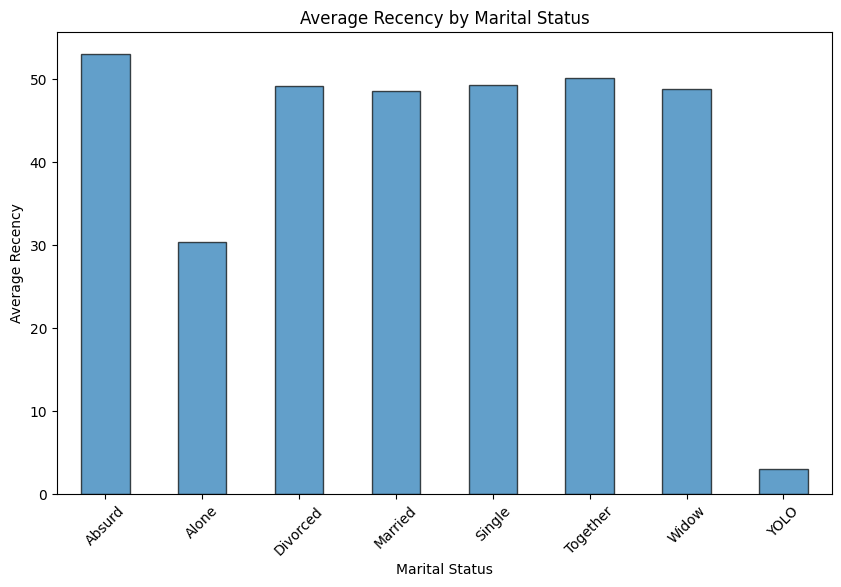

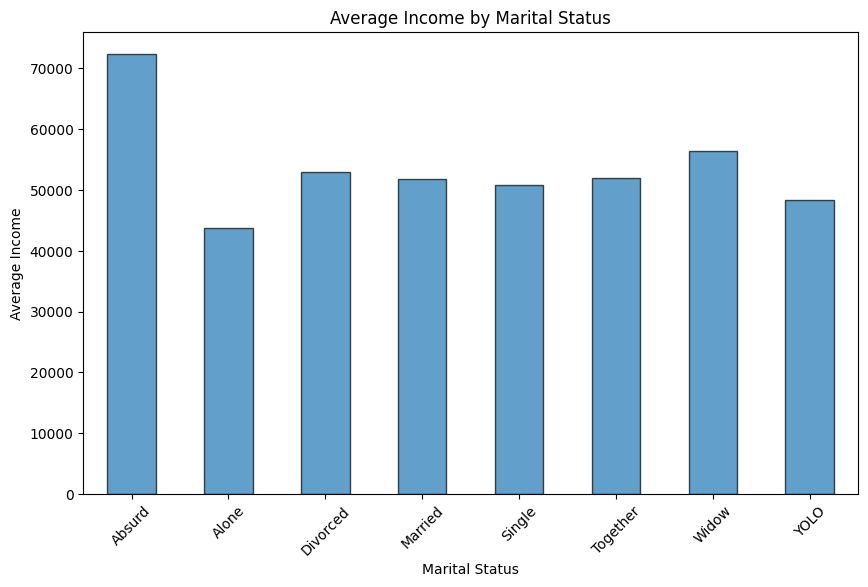

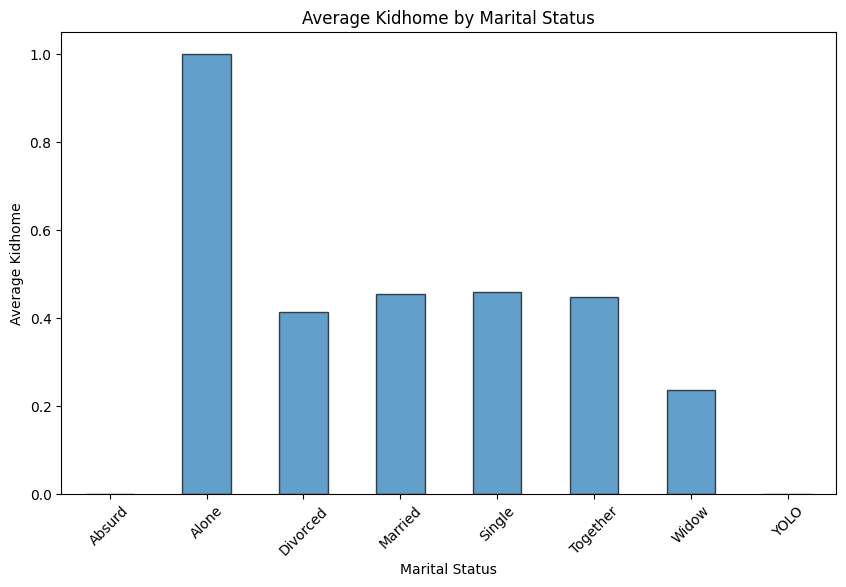

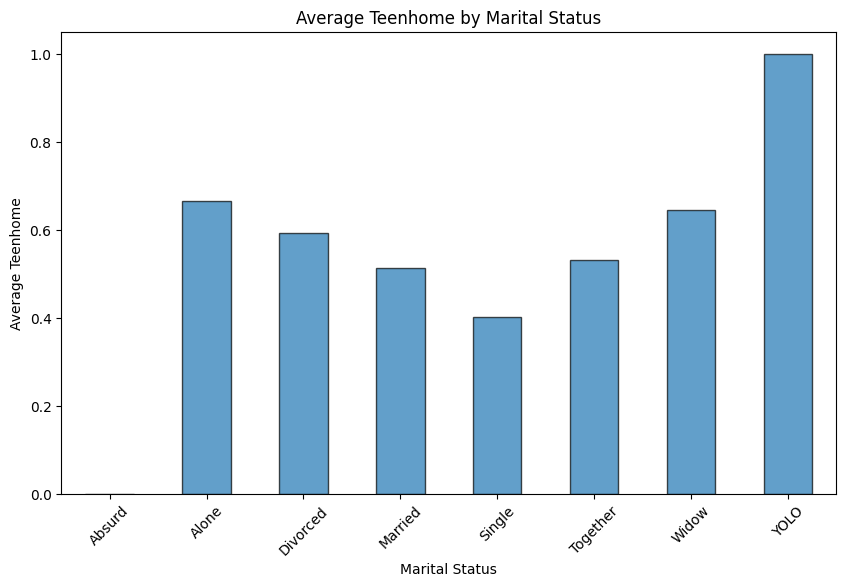

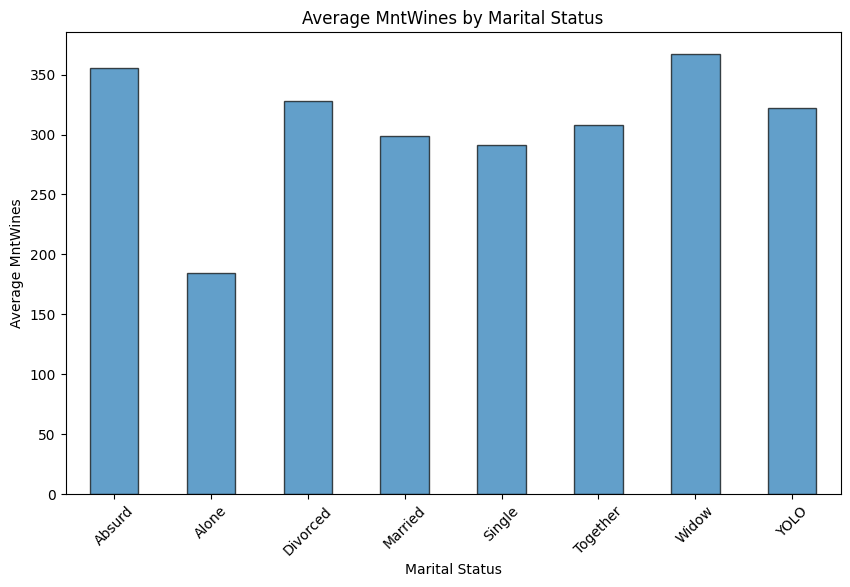

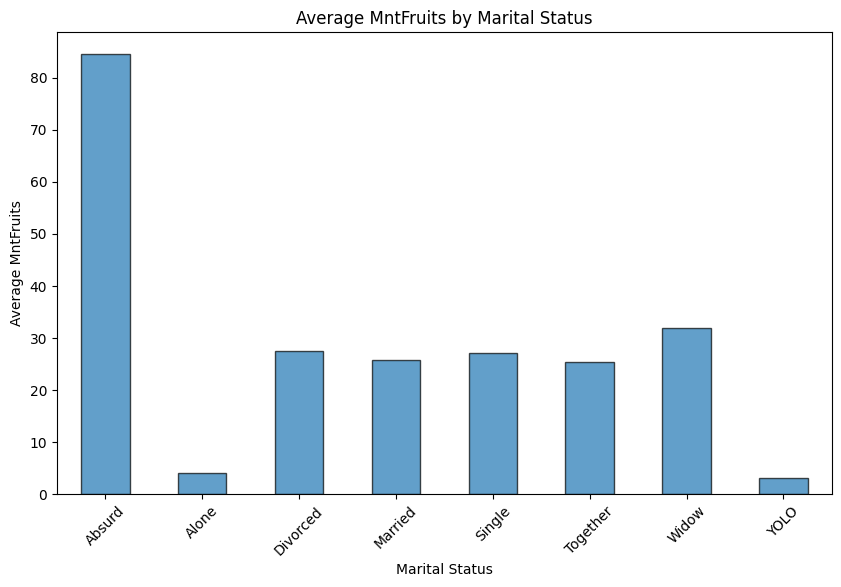

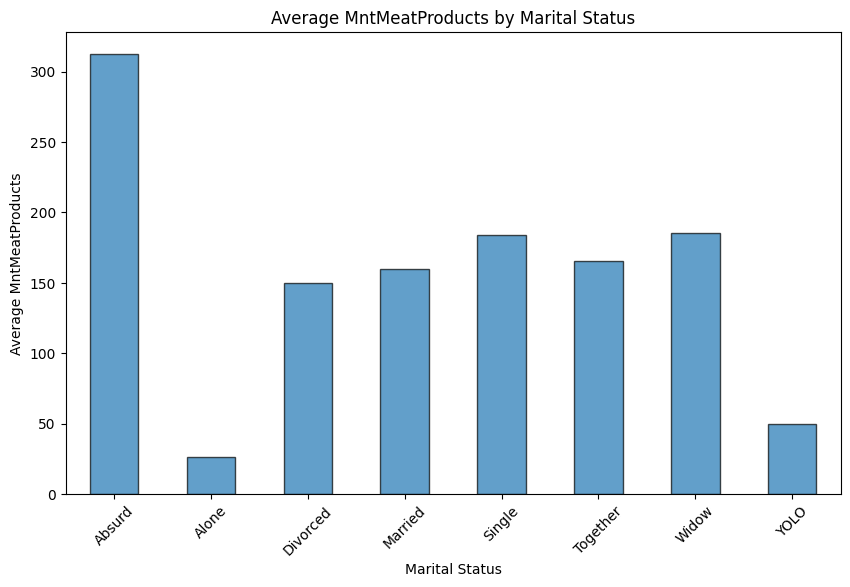

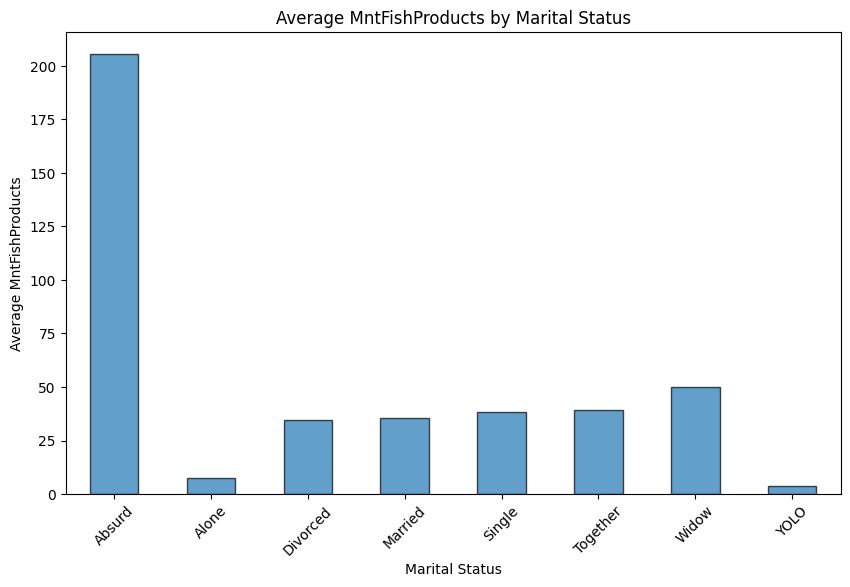

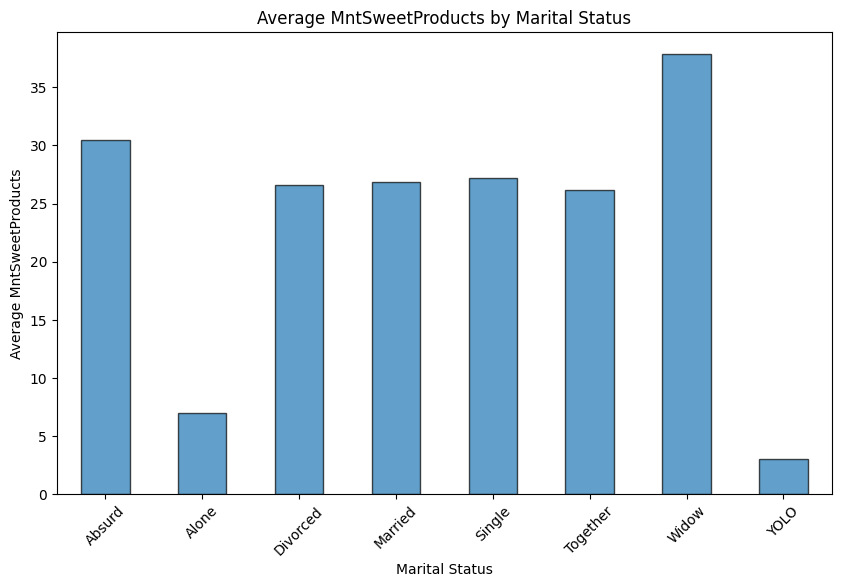

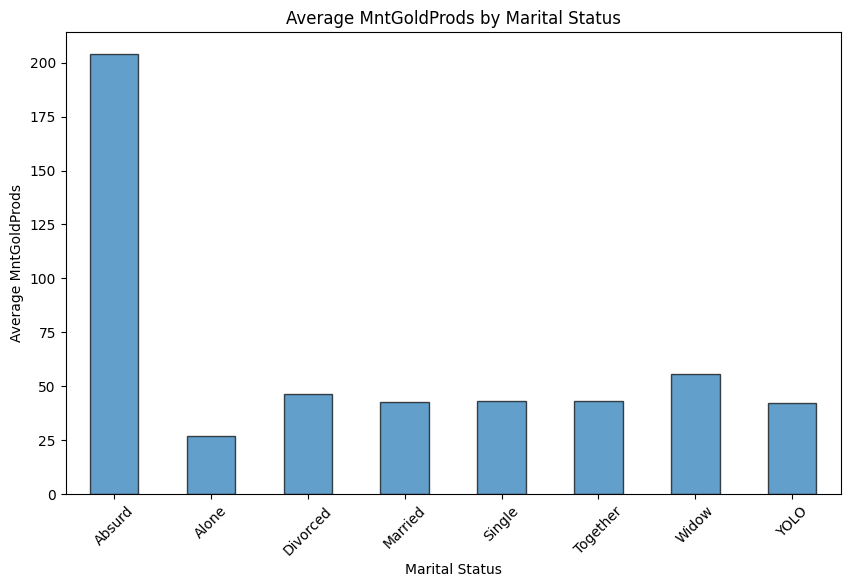

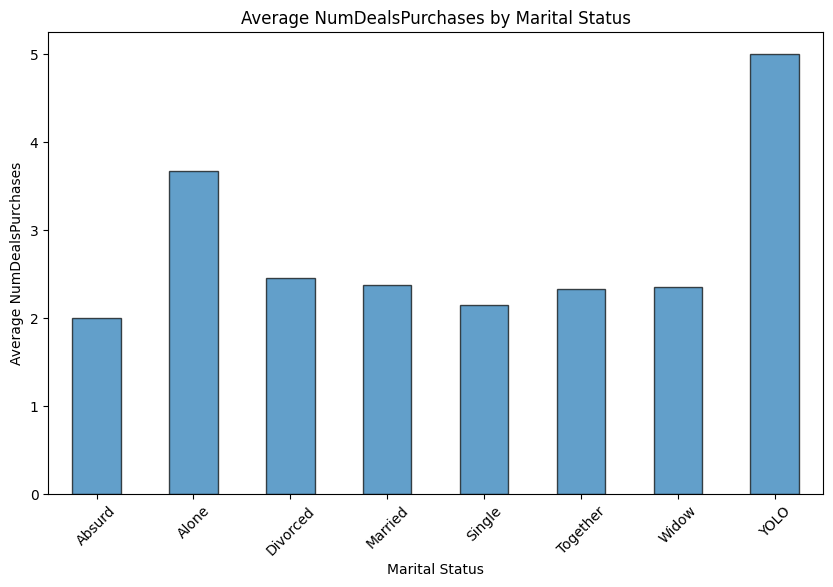

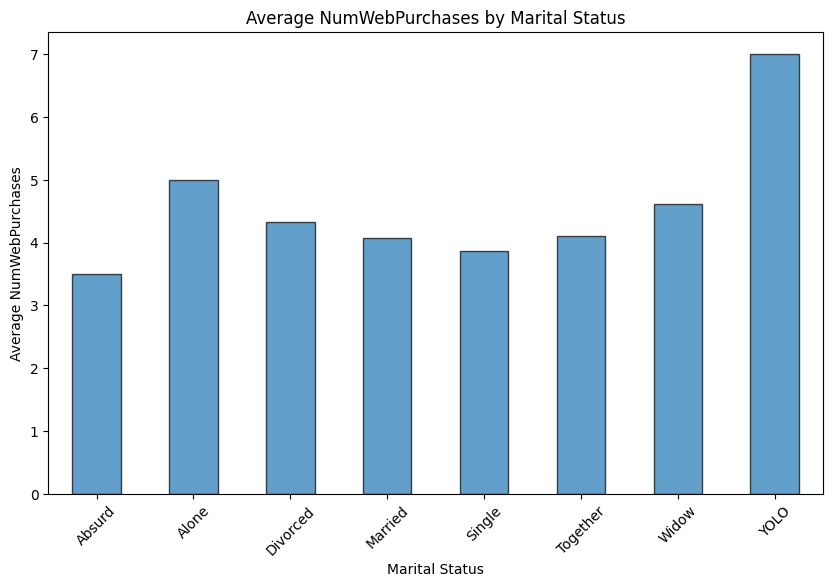

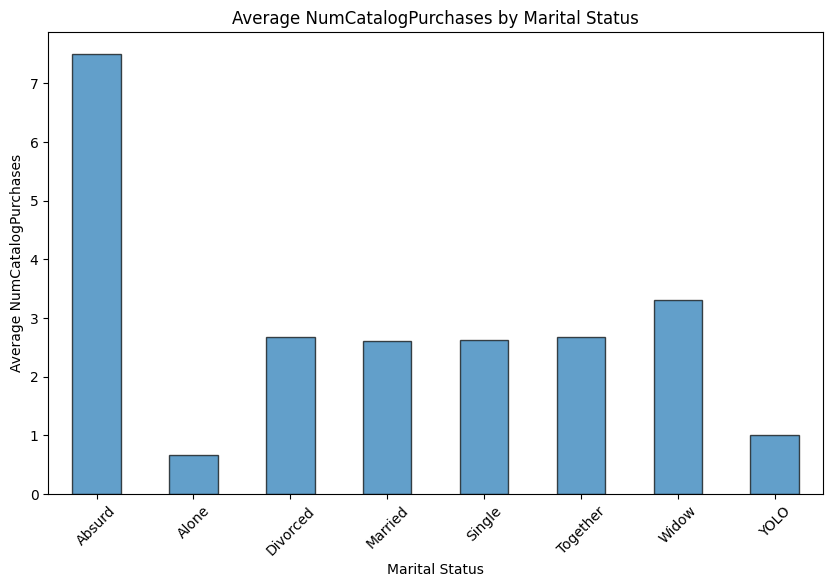

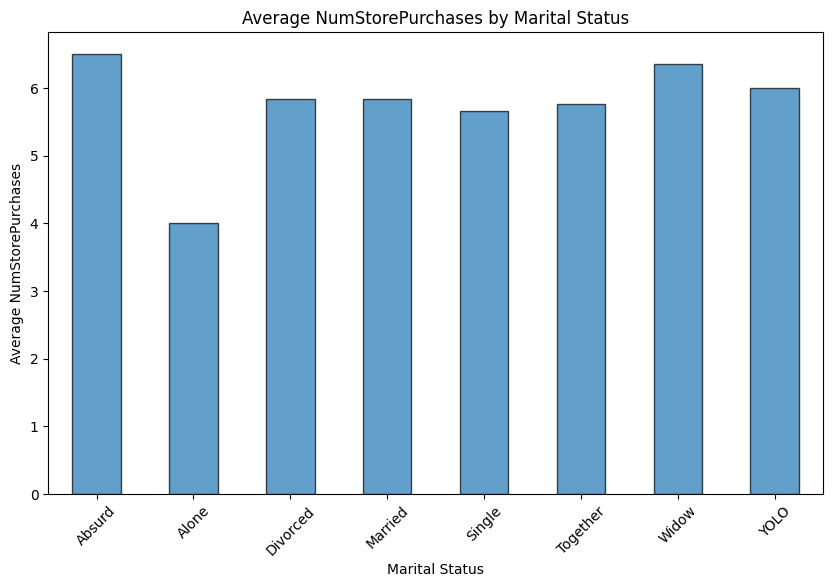

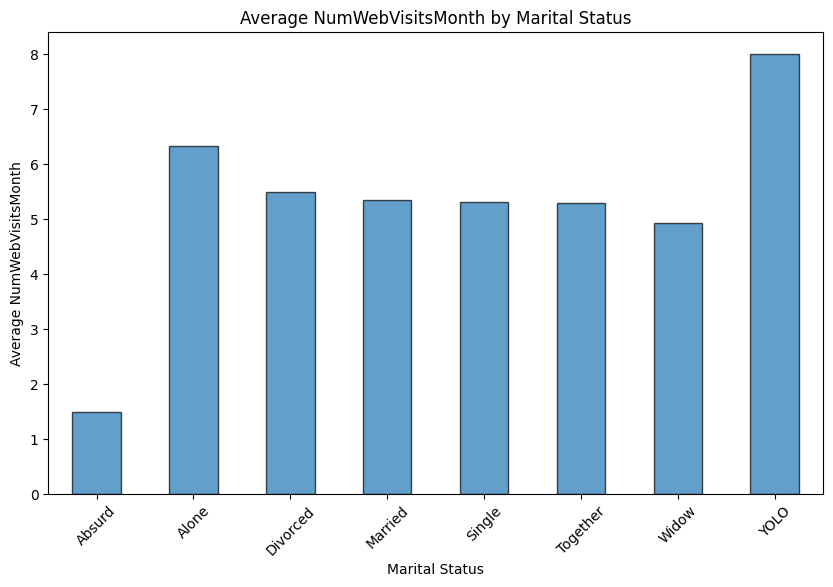

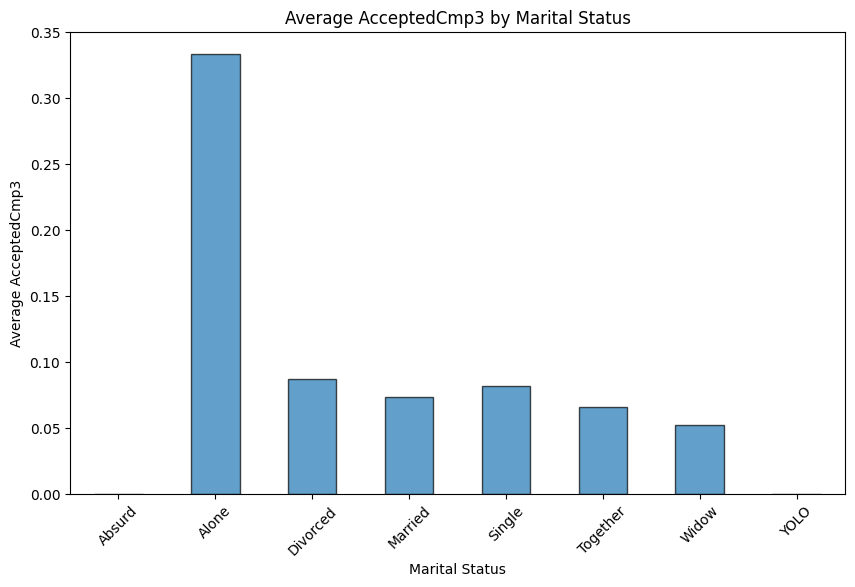

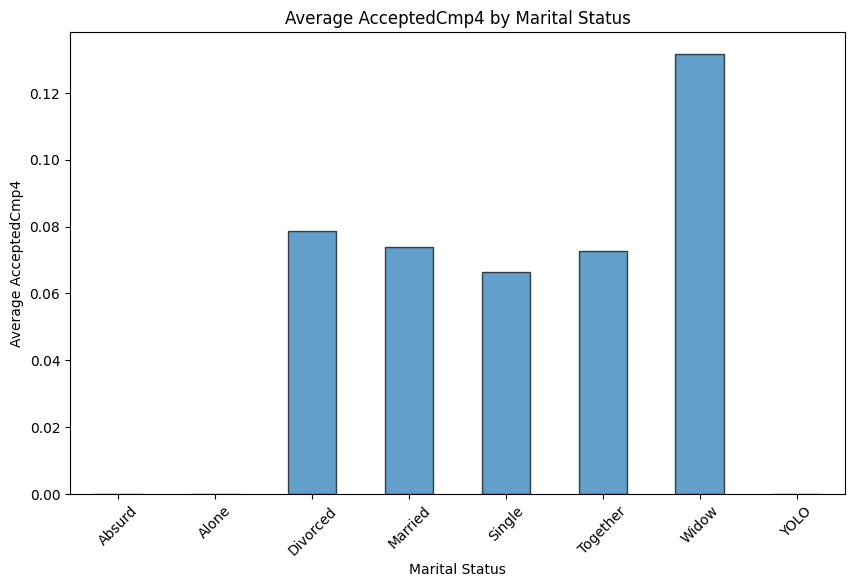

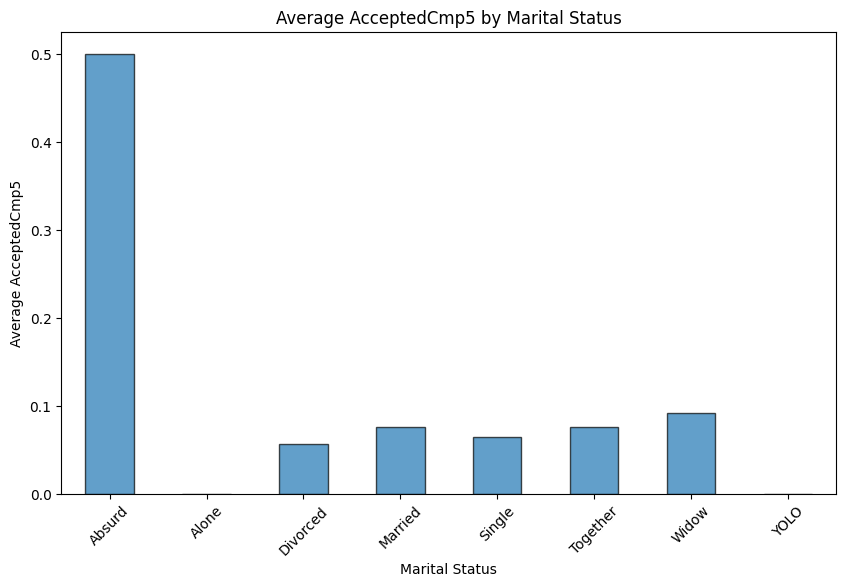

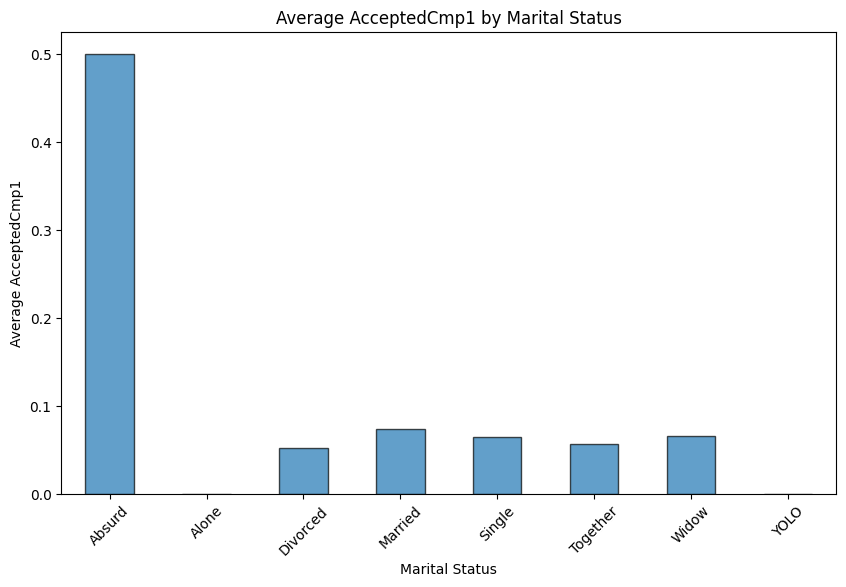

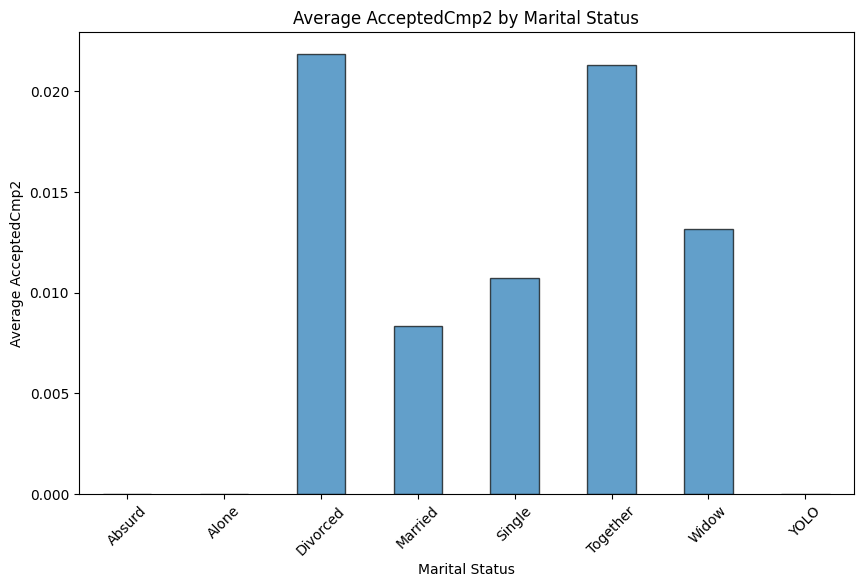

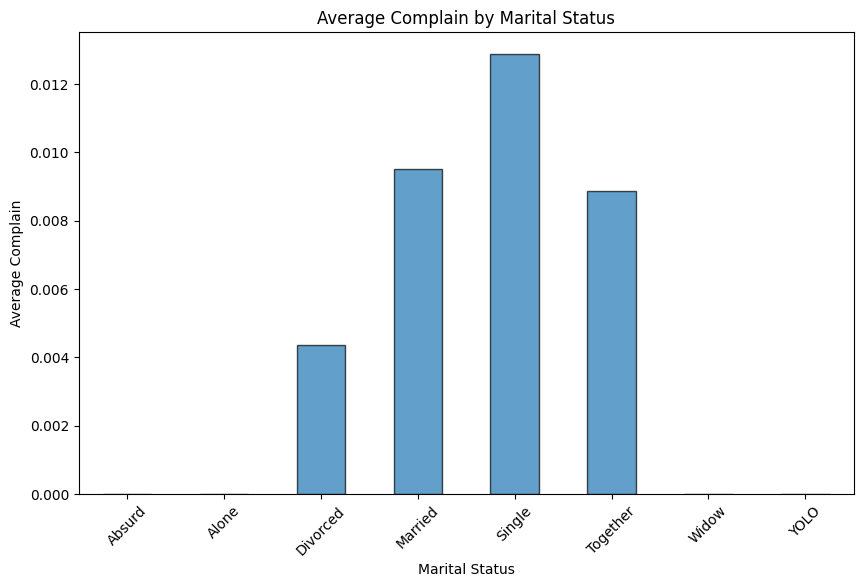

In [282]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['Recency', 'Income', 'Kidhome', 'Teenhome',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                   'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                   'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Create a plot for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df_split.groupby('Marital_Status')[column].mean().plot(kind='bar', alpha=0.7, edgecolor='black')
    plt.title(f'Average {column} by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel(f'Average {column}')
    plt.xticks(rotation=45)
    plt.show()


In [283]:
df_split.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Age Group,Income Group,Customer_Spent,Spending_Group,NumDealsPurchases_Bin,NumWebPurchases_Bin,NumCatalogPurchases_Bin,NumStorePurchases_Bin,NumWebVisitsMonth_Bin,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,67,60+,40k-60k,1617,1000+ High Spenders,Low,Low,Medium,Low,Medium,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,70,60+,40k-60k,27,0-100 Low Spenders,Low,Low,Low,Low,Low,2
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,59,51-60,60k-80k,776,101-1000 Mid Spenders,Low,Low,Low,High,Low,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,40,41-50,20k-40k,53,0-100 Low Spenders,Low,Low,Low,Low,Low,2
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,43,41-50,40k-60k,422,101-1000 Mid Spenders,Low,Low,Low,Medium,Low,0


In [284]:
# Select the relevant columns
df_Age_Group= df_split[['Age Group', 'Recency', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']]

# Define the columns for which you want to calculate the median
median_columns = ['Recency', 'Income', 'Kidhome', 'Teenhome']

# Define the columns to aggregate (sum for these columns)
aggregate_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                     'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                     'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Create the grouped DataFrame
df_Age = df_Age_Group.groupby('Age Group').agg(
    {**{col: 'median' for col in median_columns},  # Median for selected columns
     **{col: 'sum' for col in aggregate_columns}}  # Sum for selected columns
).reset_index()

# Display the grouped DataFrame
df_Age


/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_91094/168397700.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Age = df_Age_Group.groupby('Age Group').agg(


,Age Group,Recency,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,0-18,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19-30,56.0,34824.0,0.0,0.0,1424,117,1631,270,293,209,9,18,25,41,35,2,0,1,0,0,1
2,31-40,46.0,38508.0,1.0,0.0,53624,6486,42309,8411,6228,8914,351,675,513,1142,1124,18,10,26,22,3,1
3,41-50,47.0,43057.0,1.0,0.0,132268,13468,78811,19831,14100,22316,1219,2045,1250,2890,3049,54,25,34,33,4,8
4,51-60,49.0,48877.0,0.0,1.0,187719,15672,98460,20907,16196,26688,1683,2728,1525,3672,3721,45,54,42,25,10,0
5,60+,52.0,58138.0,0.0,1.0,289803,21578,141211,32481,22209,37668,1812,3446,2500,4891,3685,43,73,55,62,13,10


In [285]:
df_Age.columns

Index(['Age Group', 'Recency', 'Income', 'Kidhome', 'Teenhome', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],
      dtype='object')

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_91094/3298619569.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_grouped = df_Age.groupby('Age Group')[columns_to_plot].mean()
posx and posy should be finite values
posx and posy should be finite values


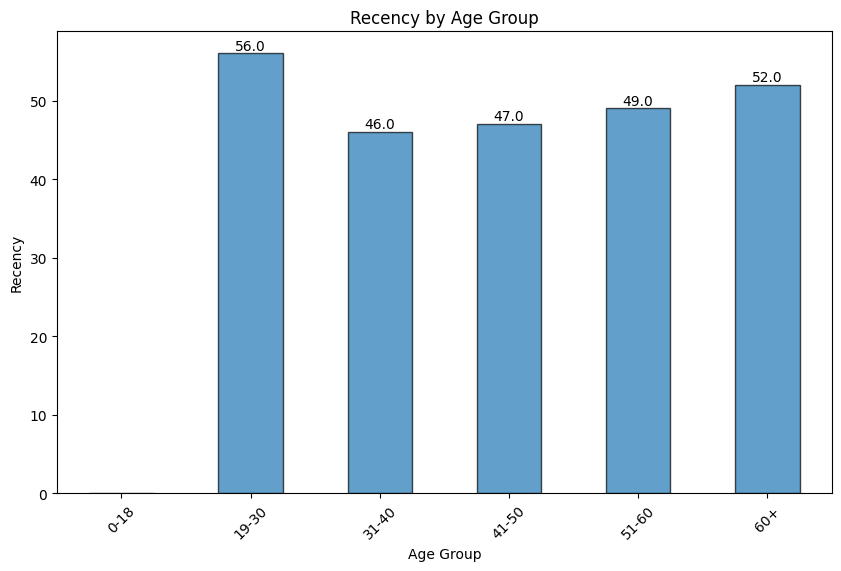

posx and posy should be finite values
posx and posy should be finite values


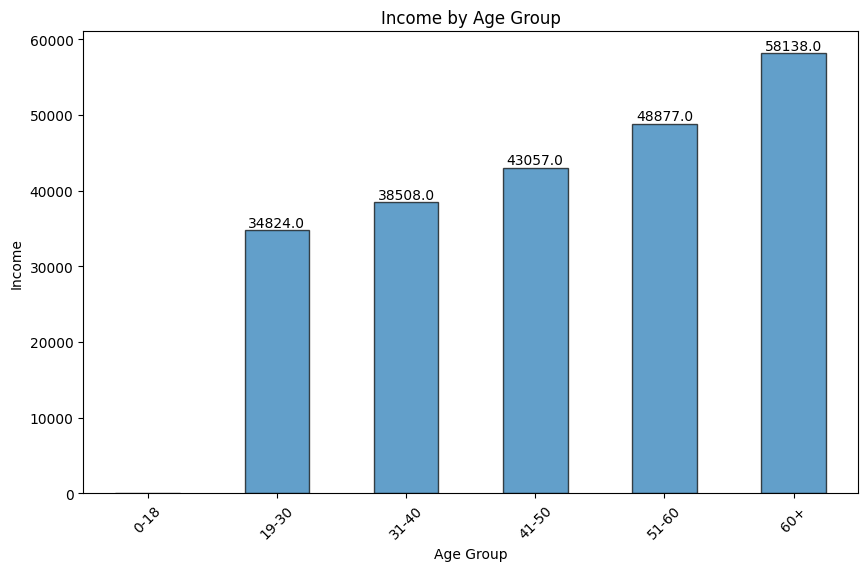

posx and posy should be finite values
posx and posy should be finite values


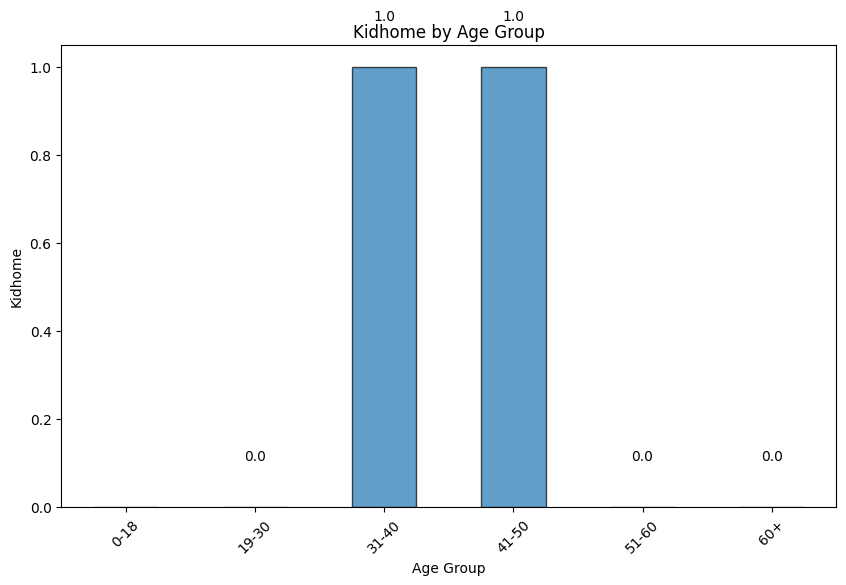

posx and posy should be finite values
posx and posy should be finite values


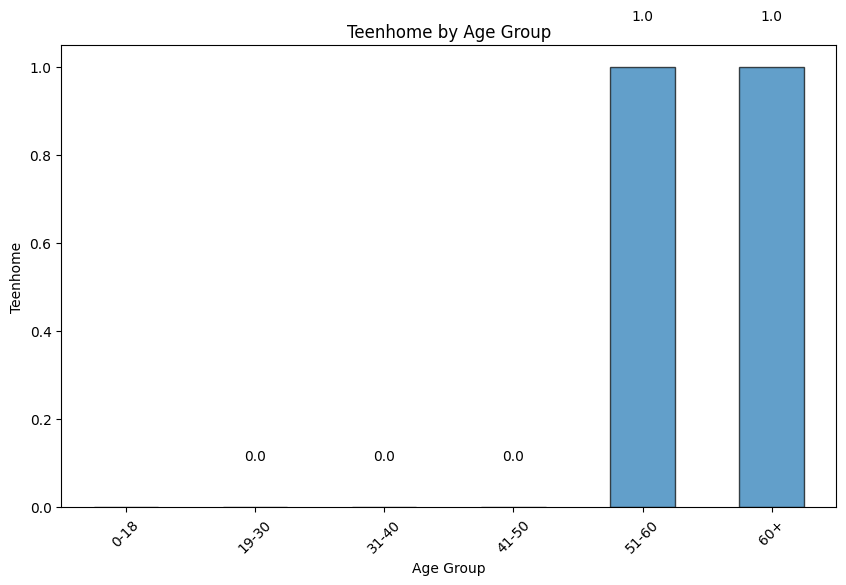

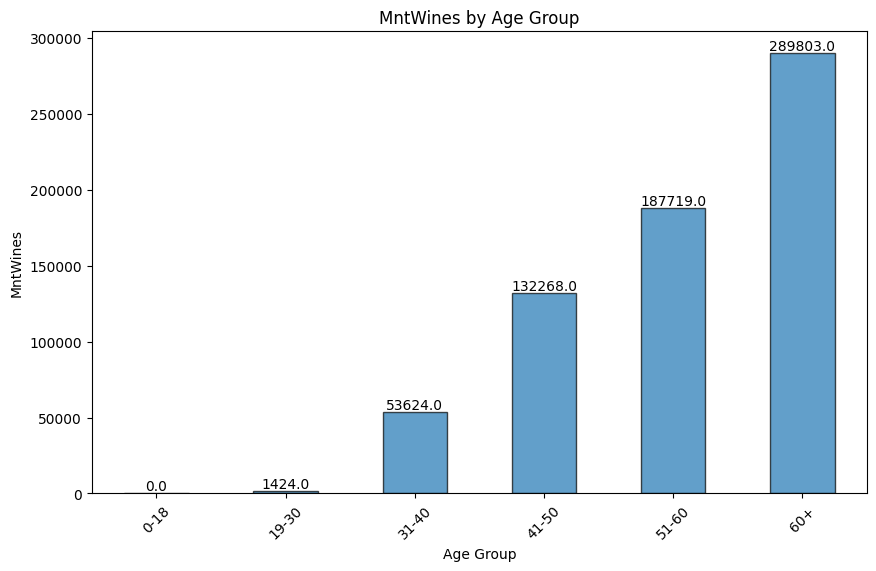

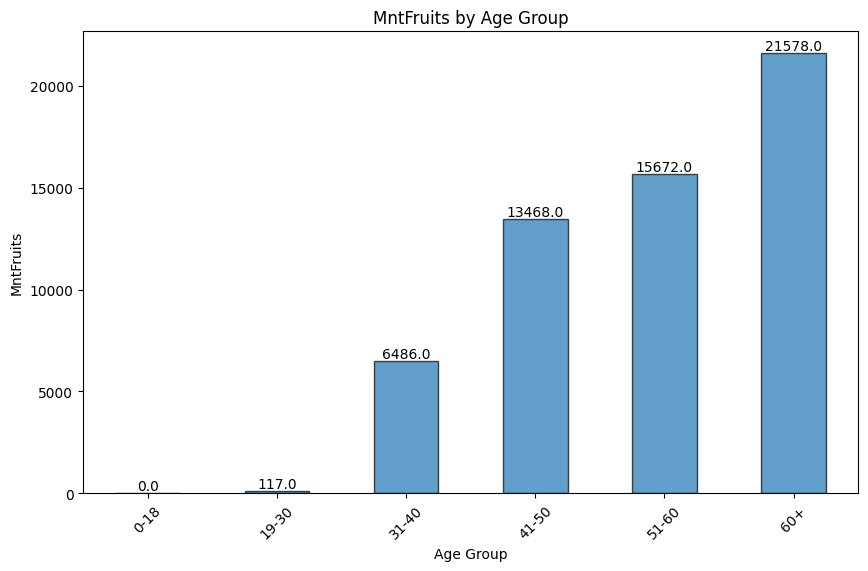

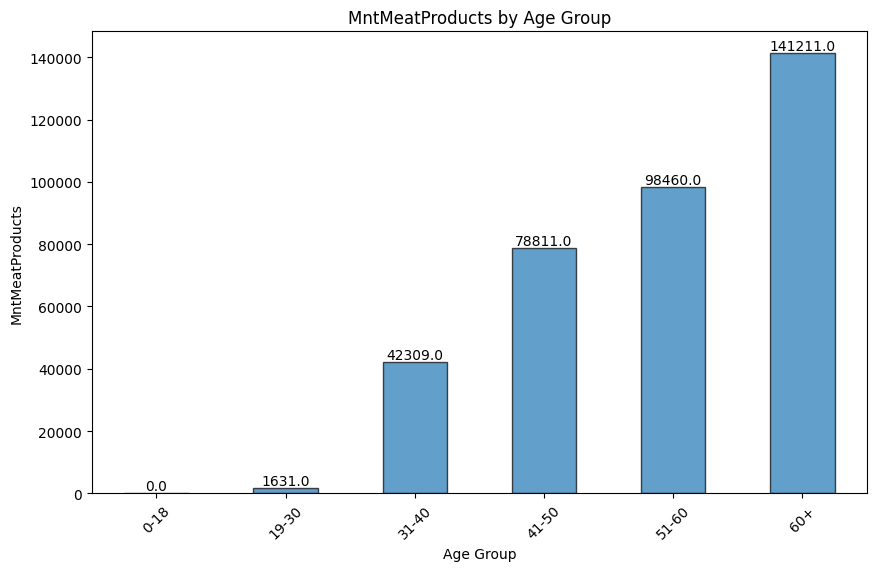

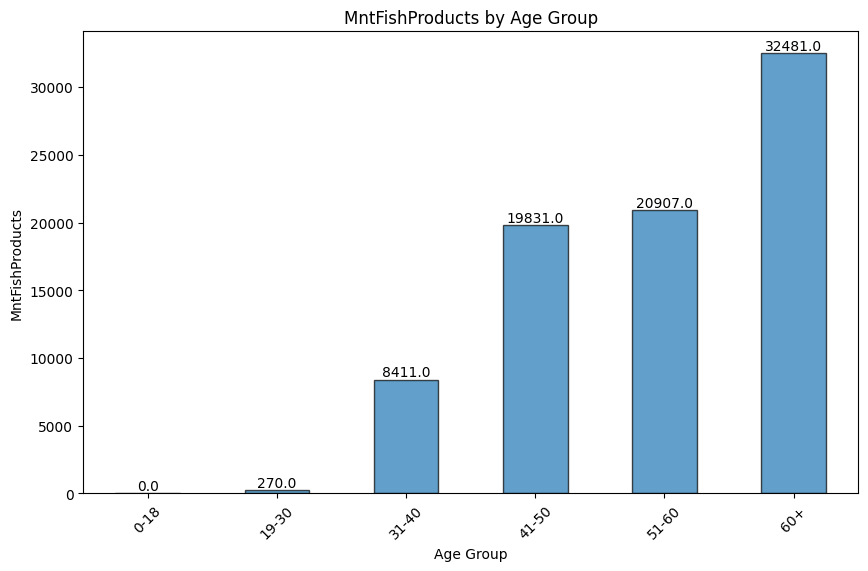

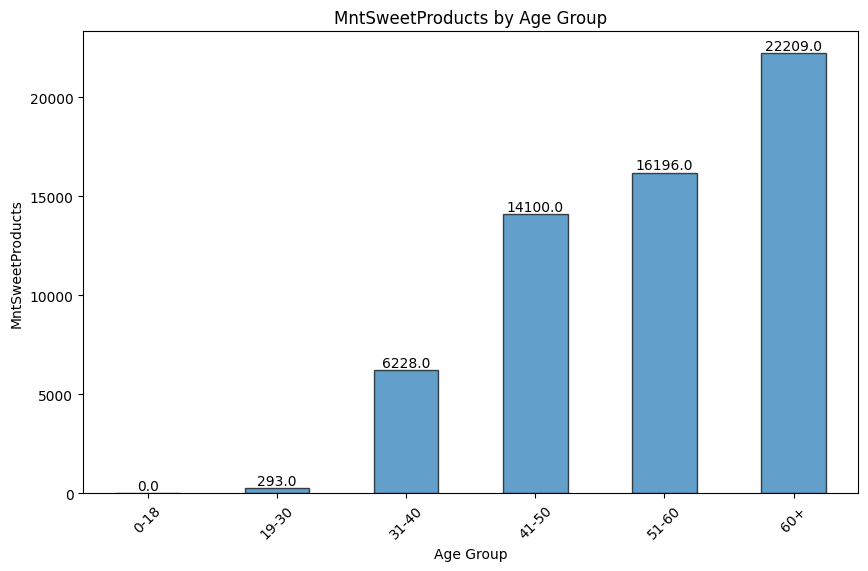

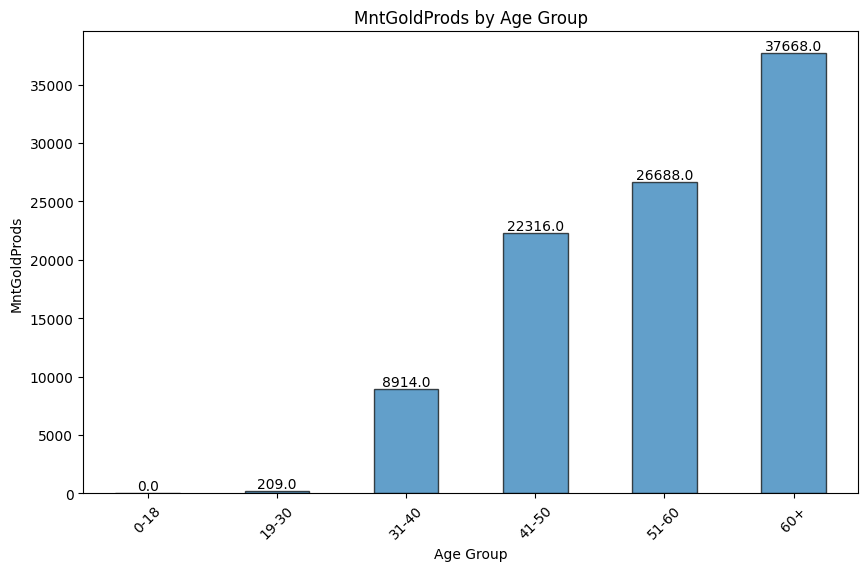

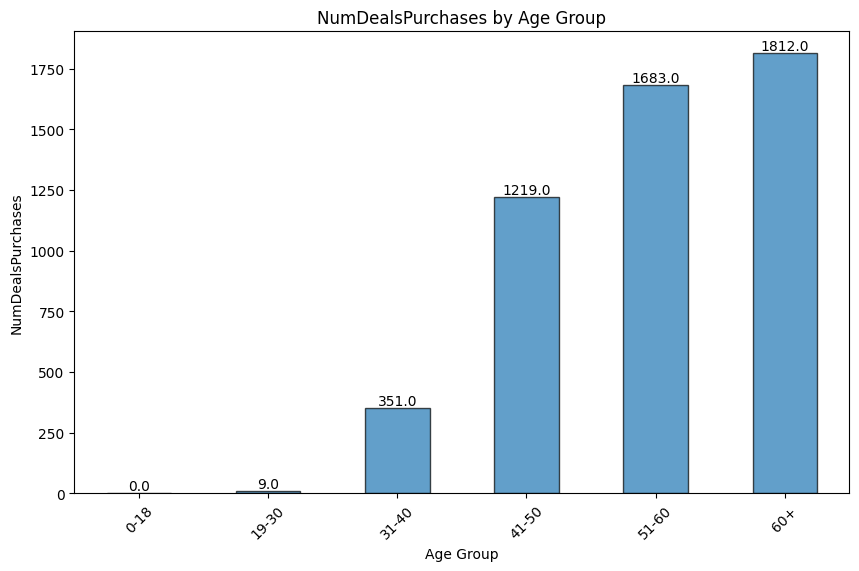

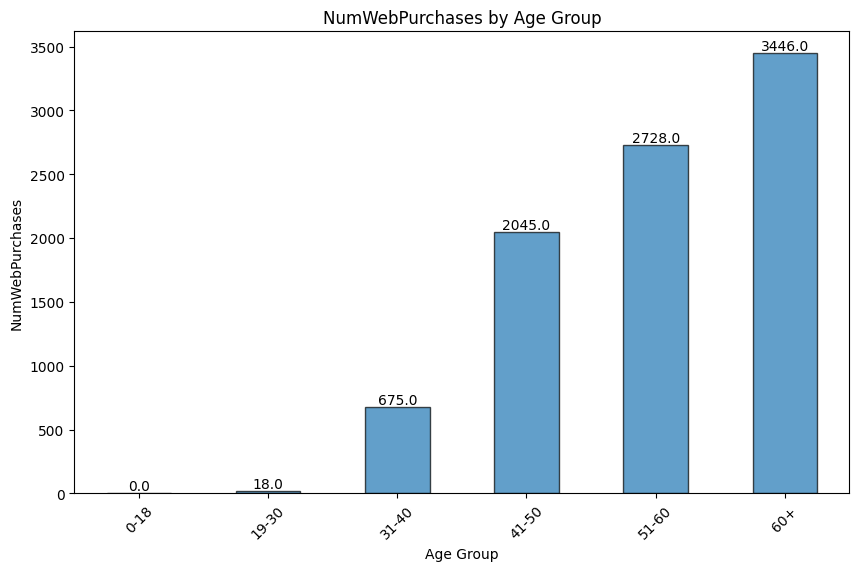

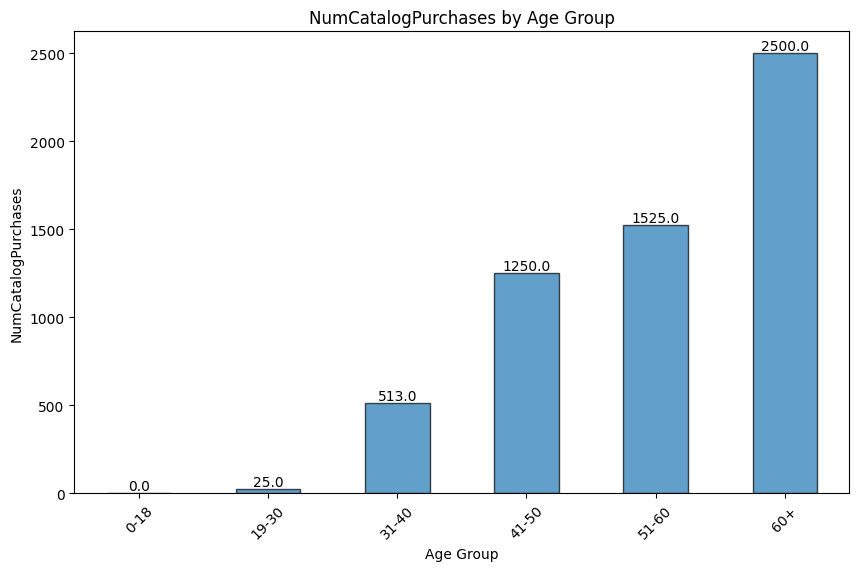

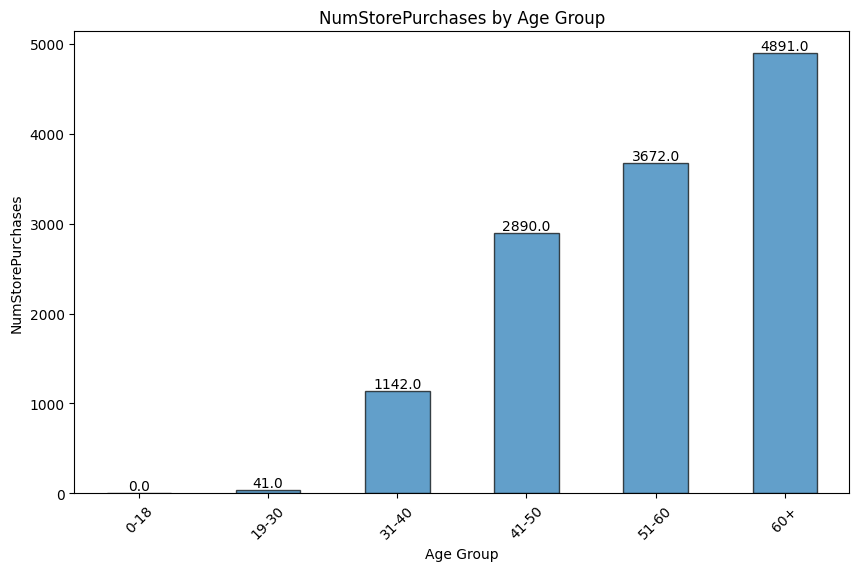

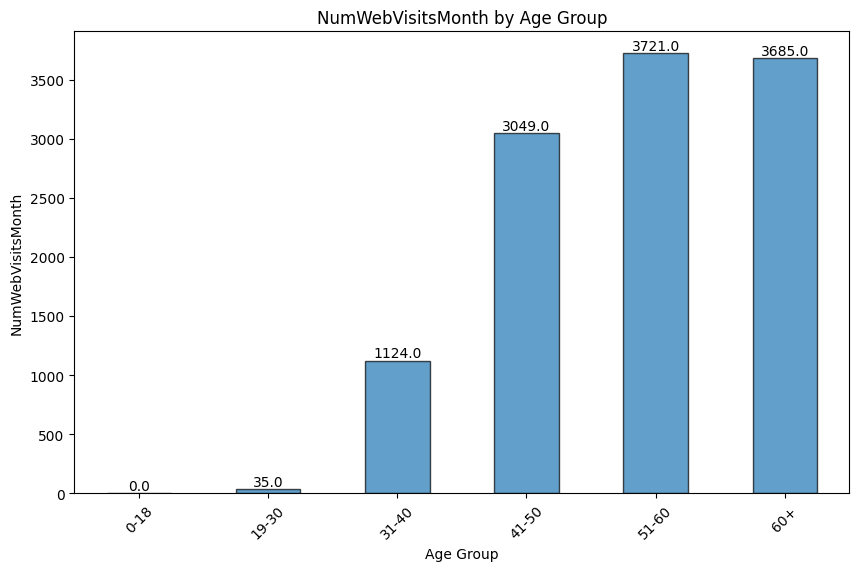

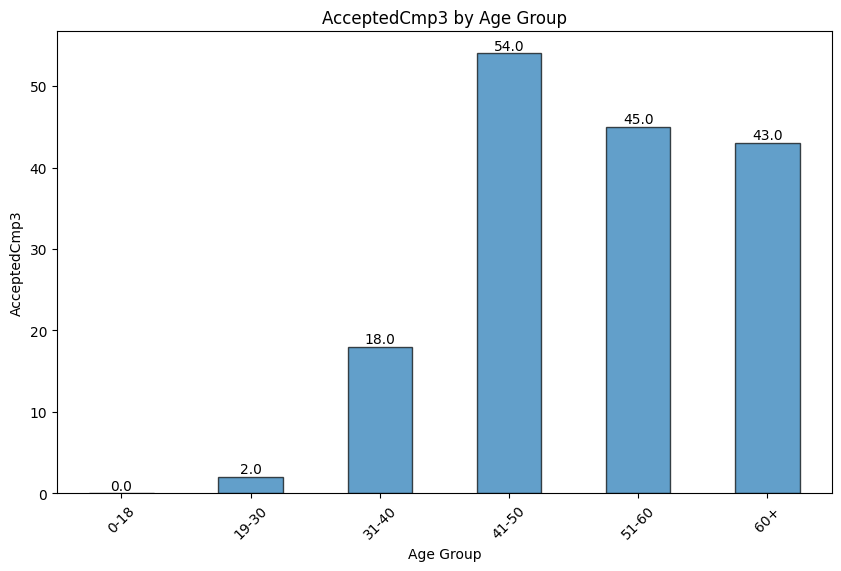

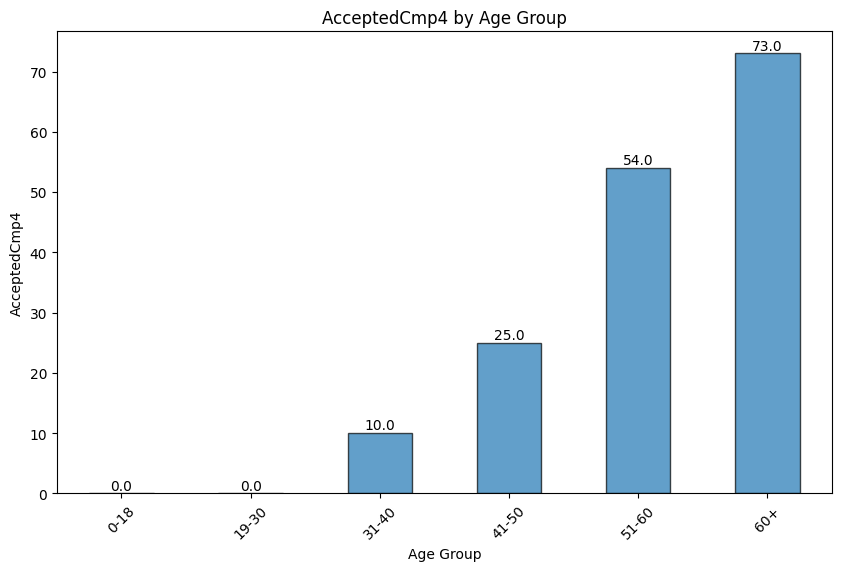

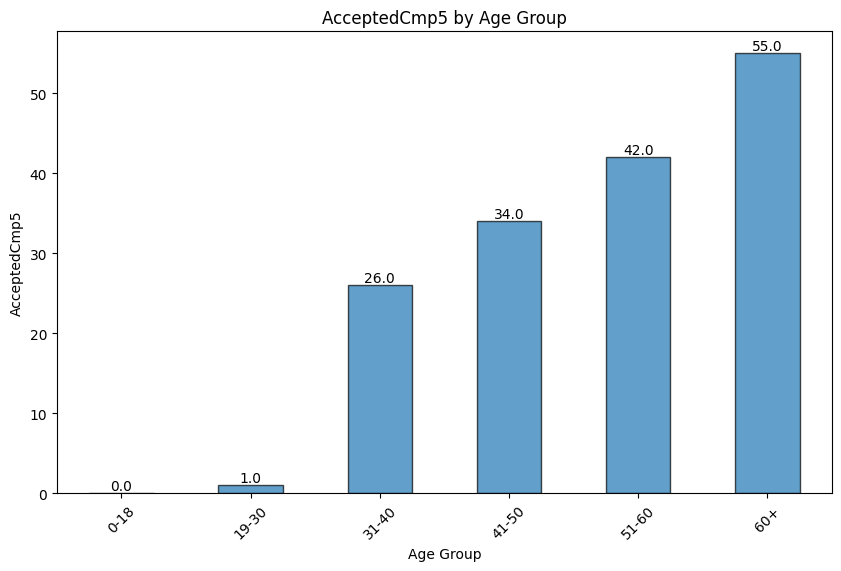

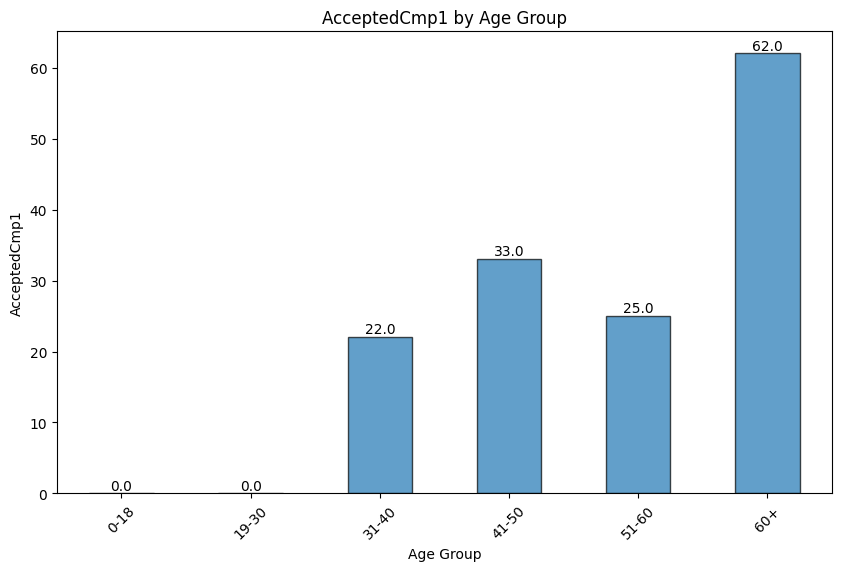

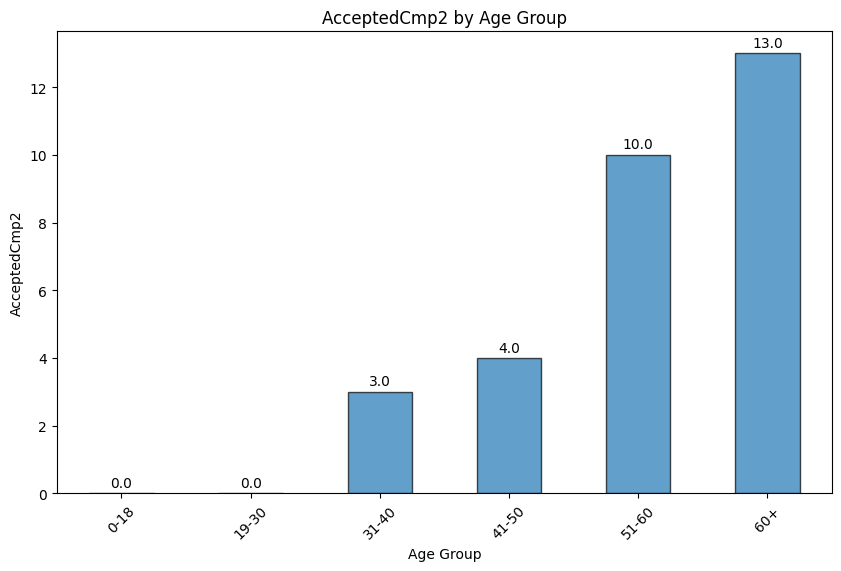

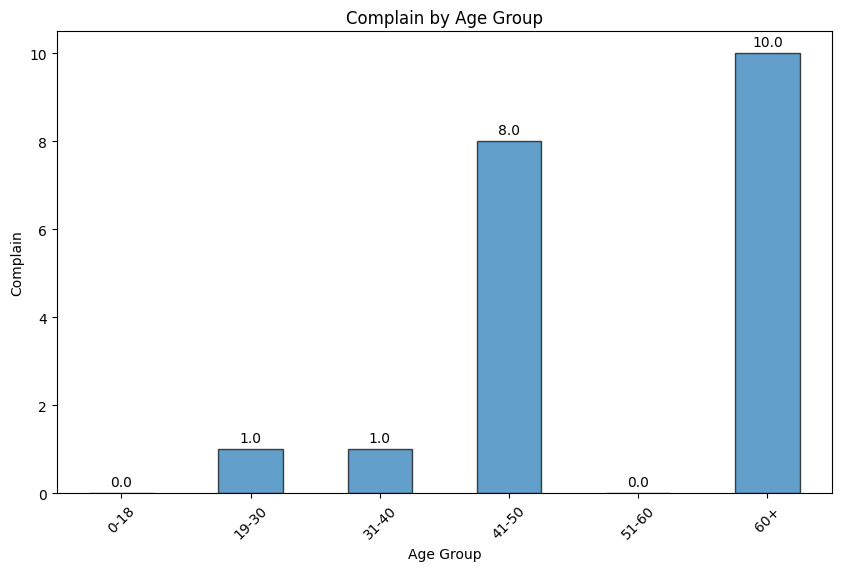

In [ ]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['Recency', 'Income', 'Kidhome', 'Teenhome', 'MntWines',
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                   'AcceptedCmp2', 'Complain']

# Group the data by 'Age Group' and calculate the mean for each column
df_age_grouped = df_Age.groupby('Age Group')[columns_to_plot].mean()

# Create a plot for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    ax = df_age_grouped[column].plot(kind='bar', alpha=0.7, edgecolor='black')
    
    # Add the count of each bar on top
    for i, v in enumerate(df_age_grouped[column]):
        ax.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
    
    plt.title(f'{column} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(f'{column}')
    plt.xticks(rotation=45)
    plt.show()
